In [232]:
# Importing required libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing
pd.pandas.set_option('display.max_columns', None)
pd.options.plotting.backend="plotly"
import pandas as pd
import mysql.connector
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Programming Task 1 : The project must be explored programmatically: this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook.

## Section 1: Data Collection 

## 1. Ireland Dataset : Ave Earings per Quarter in Ireland Construction Industry

In [233]:
df = pd.read_csv("Earnings and Hours Worked in the Building and Construction Industry.csv", skiprows=[1])

## Section 2: Data Clearning 

In [234]:
## 3.1 Summary of the data
df.head()

Unnamed: 0 All manual employee grades Skilled operatives Apprentices   
0     1969Q1                        NaN              5,024         NaN  \
1     1969Q2                        NaN              5,338         NaN   
2     1969Q3                     14,893              4,753       1,279   
3     1969Q4                        NaN              3,964         NaN   
4     1970Q1                        NaN              6,029         NaN   

  Unskilled and semi-skilled - adults  Unskilled and semi-skilled - juveniles   
0                               7,009                                     NaN  \
1                               7,659                                     NaN   
2                               7,545                                   326.0   
3                               5,906                                     NaN   
4                               8,371                                     NaN   

  Clerical employees - female  Clerical employees - male   
0                         NaN                        NaN  \
1                         NaN                        NaN   
2                         443                      564.0   
3                         NaN                        NaN   
4                         NaN                        NaN   

  Foremen and supervisors All employees (clerical and operatives)  
0                     NaN                                     NaN  
1                     NaN                                     NaN  
2                     990                                  15,900  
3                     NaN                                     NaN  
4                     NaN                                     NaN

In [235]:
df.shape # verify number of rows and columns in dataframe

(160, 10)

In [236]:
df.memory_usage() ## We need to save some memory usage.

Index                                       128
Unnamed: 0                                 1280
All manual employee grades                 1280
Skilled operatives                         1280
Apprentices                                1280
Unskilled and semi-skilled - adults        1280
Unskilled and semi-skilled - juveniles     1280
Clerical employees - female                1280
Clerical employees - male                  1280
Foremen and supervisors                    1280
All employees (clerical and operatives)    1280
dtype: int64

In [237]:
df.columns.values ## to verify the column names

array(['Unnamed: 0', 'All manual employee grades', 'Skilled operatives',
       'Apprentices', 'Unskilled and semi-skilled - adults',
       'Unskilled and semi-skilled - juveniles',
       'Clerical employees - female', 'Clerical employees - male',
       'Foremen and supervisors',
       'All employees (clerical and operatives)'], dtype=object)

In [238]:
df.dtypes ## verify the data type of each column

Unnamed: 0                                  object
All manual employee grades                  object
Skilled operatives                          object
Apprentices                                 object
Unskilled and semi-skilled - adults         object
Unskilled and semi-skilled - juveniles     float64
Clerical employees - female                 object
Clerical employees - male                  float64
Foremen and supervisors                     object
All employees (clerical and operatives)     object
dtype: object

## Programming Task : Testing & Optimisation: You are required to document and evaluate a testing and optimisation strategy for your analysis. As part of this, you may want to plan and document how you ensured your code is doing what it is meant to, as well as ensuring that the code is making good use of your resources (eg computing, time etc). Note any trade-offs that you've made in these areas.

In [239]:
## 3.2 renaming columns

In [240]:
column_mapping = {
    'Unnamed: 0': 'Year_Quarter', 'All manual employee grades':'Manual_employee_grades',
    'Skilled operatives':'Skilled_operatives','Unskilled and semi-skilled - adults':'Semi_skilled_adults',
    'Unskilled and semi-skilled - juveniles':'Semi_skilled_juveniles',
    'Clerical employees - female':'Clerical_employees_female',
    'Clerical employees - male':'Clerical_employees_male',
    'Foremen and supervisors':'Foremen_and_supervisors',
    'All employees (clerical and operatives)':'Clerical_and_Operatives'
}
df = df.rename(columns=column_mapping)

In [241]:
df.head() ## Verify the after renaming columns

Year_Quarter Manual_employee_grades Skilled_operatives Apprentices   
0       1969Q1                    NaN              5,024         NaN  \
1       1969Q2                    NaN              5,338         NaN   
2       1969Q3                 14,893              4,753       1,279   
3       1969Q4                    NaN              3,964         NaN   
4       1970Q1                    NaN              6,029         NaN   

  Semi_skilled_adults  Semi_skilled_juveniles Clerical_employees_female   
0               7,009                     NaN                       NaN  \
1               7,659                     NaN                       NaN   
2               7,545                   326.0                       443   
3               5,906                     NaN                       NaN   
4               8,371                     NaN                       NaN   

   Clerical_employees_male Foremen_and_supervisors Clerical_and_Operatives  
0                      NaN                     NaN                     NaN  
1                      NaN                     NaN                     NaN  
2                    564.0                     990                  15,900  
3                      NaN                     NaN                     NaN  
4                      NaN                     NaN                     NaN

In [242]:
## 3.3 Slipt Year_Quarter in to Year and Quarter

In [243]:
df['Year and Quarter'] =df['Year_Quarter'].str.replace(r'(\w{4})',r'\1-',regex=True).str.strip('\-') # Add new 'Year and Quarter' column by replacing the pattern
df[['Year','Quarter']] = df['Year and Quarter'].str.split('-',expand=True) # Split 'Year and Quarter' column into separate 'Year' and 'Quarter' columns
df = df.drop(['Year_Quarter','Year and Quarter'], axis=1) # Drop unnecessary columns

In [244]:
## 3.4 Reorder columns

In [245]:
df=df[["Year","Quarter","Manual_employee_grades","Skilled_operatives","Apprentices","Semi_skilled_adults","Semi_skilled_juveniles","Clerical_employees_female",
       "Clerical_employees_male","Foremen_and_supervisors","Clerical_and_Operatives"]]

In [246]:
df.tail()  ## Verify the after reordering columns

Year Quarter Manual_employee_grades Skilled_operatives Apprentices   
155  2007      Q4                 13,134              4,316       1,397  \
156  2008      Q1                 11,951              3,934       1,097   
157  2008      Q2                 12,320              4,117       1,247   
158  2008      Q3                 11,154              3,730       1,302   
159  2008      Q4                  8,811              2,951         838   

    Semi_skilled_adults  Semi_skilled_juveniles Clerical_employees_female   
155               5,469                    70.0                     1,119  \
156               5,260                    52.0                     1,126   
157               5,236                   102.0                     1,148   
158               4,526                    56.0                     1,029   
159               3,572                    32.0                       951   

     Clerical_employees_male Foremen_and_supervisors Clerical_and_Operatives  
155                    541.0                   1,882                  14,794  
156                    546.0                   1,608                  13,623  
157                    519.0                   1,618                  13,987  
158                    445.0                   1,540                  12,628  
159                    398.0                   1,418                  10,160

In [247]:
## 3.5 find any missing values 

In [248]:
df.isnull().sum()

Year                          0
Quarter                       0
Manual_employee_grades       39
Skilled_operatives            0
Apprentices                  39
Semi_skilled_adults           0
Semi_skilled_juveniles       39
Clerical_employees_female    39
Clerical_employees_male      39
Foremen_and_supervisors      39
Clerical_and_Operatives      39
dtype: int64

In [249]:
## 3.6 impute the missing values with forwardfill and backwordfill

In [250]:
df = df.fillna(method='ffill') ## filling the missing values with forward fill method as less number of labels are missing

In [251]:
df = df.fillna(method='backfill')  ## after forward fill only 2 labels missing, so I am using back fill meth

In [252]:
df.isnull().sum() ## Testing again missing values after impute 

Year                         0
Quarter                      0
Manual_employee_grades       0
Skilled_operatives           0
Apprentices                  0
Semi_skilled_adults          0
Semi_skilled_juveniles       0
Clerical_employees_female    0
Clerical_employees_male      0
Foremen_and_supervisors      0
Clerical_and_Operatives      0
dtype: int64

## Section 3: Data preparation

In [253]:
## to do forther analysis we need to convert data type to int for all the variables

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       160 non-null    object 
 1   Quarter                    160 non-null    object 
 2   Manual_employee_grades     160 non-null    object 
 3   Skilled_operatives         160 non-null    object 
 4   Apprentices                160 non-null    object 
 5   Semi_skilled_adults        160 non-null    object 
 6   Semi_skilled_juveniles     160 non-null    float64
 7   Clerical_employees_female  160 non-null    object 
 8   Clerical_employees_male    160 non-null    float64
 9   Foremen_and_supervisors    160 non-null    object 
 10  Clerical_and_Operatives    160 non-null    object 
dtypes: float64(2), object(9)
memory usage: 13.9+ KB


In [255]:
## replace ',' with '' in columns values

In [256]:
## remove ',' from each column
df['Manual_employee_grades']=df['Manual_employee_grades'].str.replace(',','') 
df['Skilled_operatives']=df['Skilled_operatives'].str.replace(',','')
df['Apprentices']=df['Apprentices'].str.replace(',','')
df['Semi_skilled_adults']=df['Semi_skilled_adults'].str.replace(',','')
df['Clerical_and_Operatives']=df['Clerical_and_Operatives'].str.replace(',','')
df['Clerical_employees_female']=df['Clerical_employees_female'].str.replace(',','')
df['Foremen_and_supervisors']=df['Foremen_and_supervisors'].str.replace(',','')

In [257]:
## 3.8 converting object and float Dtypes to int.

In [258]:
df= df.astype({'Year':'int', 'Quarter':'category','Manual_employee_grades':'int','Skilled_operatives':'int','Apprentices':'int','Semi_skilled_juveniles':'int',
              'Semi_skilled_adults':'int','Clerical_employees_female':'int','Clerical_employees_male':'int','Clerical_and_Operatives':'int'})

In [259]:
df.info() ## Verifying after converting data types to int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       160 non-null    int32   
 1   Quarter                    160 non-null    category
 2   Manual_employee_grades     160 non-null    int32   
 3   Skilled_operatives         160 non-null    int32   
 4   Apprentices                160 non-null    int32   
 5   Semi_skilled_adults        160 non-null    int32   
 6   Semi_skilled_juveniles     160 non-null    int32   
 7   Clerical_employees_female  160 non-null    int32   
 8   Clerical_employees_male    160 non-null    int32   
 9   Foremen_and_supervisors    160 non-null    object  
 10  Clerical_and_Operatives    160 non-null    int32   
dtypes: category(1), int32(9), object(1)
memory usage: 7.4+ KB


In [260]:
df["Foremen_and_supervisors"]=df["Foremen_and_supervisors"].astype('float64') ## convert Dtype object to float

In [261]:
df["Foremen_and_supervisors"]=df["Foremen_and_supervisors"].astype('int') ## convert Dtype again from float to int

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Year                       160 non-null    int32   
 1   Quarter                    160 non-null    category
 2   Manual_employee_grades     160 non-null    int32   
 3   Skilled_operatives         160 non-null    int32   
 4   Apprentices                160 non-null    int32   
 5   Semi_skilled_adults        160 non-null    int32   
 6   Semi_skilled_juveniles     160 non-null    int32   
 7   Clerical_employees_female  160 non-null    int32   
 8   Clerical_employees_male    160 non-null    int32   
 9   Foremen_and_supervisors    160 non-null    int32   
 10  Clerical_and_Operatives    160 non-null    int32   
dtypes: category(1), int32(10)
memory usage: 6.7 KB


In [263]:
## Testing again before moving to ML part
df.isnull().sum()

Year                         0
Quarter                      0
Manual_employee_grades       0
Skilled_operatives           0
Apprentices                  0
Semi_skilled_adults          0
Semi_skilled_juveniles       0
Clerical_employees_female    0
Clerical_employees_male      0
Foremen_and_supervisors      0
Clerical_and_Operatives      0
dtype: int64

In [264]:
df.duplicated().sum()

0

In [265]:
df.memory_usage() ## We have saved on memory usage. dataset is small but we can apply the efficiencies to a large dataset

Index                        128
Year                         640
Quarter                      364
Manual_employee_grades       640
Skilled_operatives           640
Apprentices                  640
Semi_skilled_adults          640
Semi_skilled_juveniles       640
Clerical_employees_female    640
Clerical_employees_male      640
Foremen_and_supervisors      640
Clerical_and_Operatives      640
dtype: int64

In [266]:
#ireland_ml = df.to_csv('ireland_ml.csv', index=False)

## Programming task : Data structures: You are required to gather and process data that has been stored in at least two distinct formats. For example, this can be data in a CSV file, from a MySQL database or from a web API in JSON format

## Section 4: Data extraction to MYSQL database table

#### Data frame export MySQL Database

In [267]:
#y = []

#for i in range(len(df)):
#    row_tuple = tuple(df.iloc[i])
#   y.append(row_tuple)
#y

In [268]:
## 2.Save the list as a txt file
#file = open('Ireland_Avg_Earnings_Week.txt', 'w')

#for tuple in y:
#    file.write(str(tuple) + ',' + '\n')

#file.close()

#### Process to import .txt file in to MYSQL Database Table 

In [269]:
## Connect to MYSql database

db = mysql.connector.connect(
host="localhost",
user="root",
password="ParklandsRow7*",
#database="ireland_avg_earnings_week"
)

In [270]:
conn = db.cursor()

In [271]:
#conn.execute("CREATE DATABASE ireland_avg_earnings_week;") ## Create a Database "ireland_avg_earnings_week"

In [272]:
## Use the "ireland_avg_earnings_week" database to create table and incert the data from above txt file.
conn.execute ("USE ireland_avg_earnings_week")

In [273]:
## Create table "avg_earnings_week"

#conn.execute("CREATE TABLE avg_earnings_week (Year int, Quarter VARCHAR(10), Manual_employee_grades int, Skilled_operatives int, Apprentices int, Semi_skilled_adults int, Clerical_employees_female int, Clerical_employees_male int, Foremen_and_supervisors int, Clerical_and_Operatives int);")


In [274]:
## Commit the code to MYsql
db.commit() 

In [275]:
##  After creating the Database and the table in Mysql go to txt file and Copy all the data and go to MySql and create a Insert INTO table values 
##  and paste all the data and run it.

## Section 5: Exploratory Data Anlysis (EDA), Feature Selction and Outliers detection

In [276]:
## Connecting to MYSql database
connection = mysql.connector.connect(
host="localhost",
user="root",
password="ParklandsRow7*",
database="ireland_avg_earnings_week"
)

In [277]:
query = "SELECT * FROM avg_earnings_week" ## query for selecting the table where the cleaned data is stored from notebook 1.

In [278]:
df = pd.read_sql(query, connection); ## read data as pandas dataframe from Mysql batabase table.
df.head()

Year Quarter  Manual_employee_grades  Skilled_operatives  Apprentices   
0  1969      Q1                   14893                5024         1279  \
1  1969      Q2                   14893                5338         1279   
2  1969      Q3                   14893                4753         1279   
3  1969      Q4                   14893                3964         1279   
4  1970      Q1                   14893                6029         1279   

   Semi_skilled_adults  Clerical_employees_female  Clerical_employees_male   
0                 7009                        443                      564  \
1                 7659                        443                      564   
2                 7545                        443                      564   
3                 5906                        443                      564   
4                 8371                        443                      564   

   Foremen_and_supervisors  Clerical_and_Operatives  
0                      990                    15900  
1                      990                    15900  
2                      990                    15900  
3                      990                    15900  
4                      990                    15900

In [279]:
df.tail() # verify bottom 5 rows in data frame

Year Quarter  Manual_employee_grades  Skilled_operatives  Apprentices   
155  2007      Q4                   13134                4316         1397  \
156  2008      Q1                   11951                3934         1097   
157  2008      Q2                   12320                4117         1247   
158  2008      Q3                   11154                3730         1302   
159  2008      Q4                    8811                2951          838   

     Semi_skilled_adults  Clerical_employees_female  Clerical_employees_male   
155                 5469                       1119                      541  \
156                 5260                       1126                      546   
157                 5236                       1148                      519   
158                 4526                       1029                      445   
159                 3572                        951                      398   

     Foremen_and_supervisors  Clerical_and_Operatives  
155                     1882                    14794  
156                     1608                    13623  
157                     1618                    13987  
158                     1540                    12628  
159                     1418                    10160

In [280]:
df.shape ## verify number of rows and columns in data frame

(160, 10)

In [281]:
df.dtypes ## verify each column data type

Year                          int64
Quarter                      object
Manual_employee_grades        int64
Skilled_operatives            int64
Apprentices                   int64
Semi_skilled_adults           int64
Clerical_employees_female     int64
Clerical_employees_male       int64
Foremen_and_supervisors       int64
Clerical_and_Operatives       int64
dtype: object

In [282]:
df.describe() ## verify data description 

Year  Manual_employee_grades  Skilled_operatives  Apprentices   
count   160.000000              160.000000          160.000000   160.000000  \
mean   1988.500000            14288.206250         5104.537500  1588.125000   
std      11.579639             4459.152117         1685.199807   546.545121   
min    1969.000000             7861.000000         2951.000000   838.000000   
25%    1978.750000            11011.250000         4065.000000  1259.500000   
50%    1988.500000            14040.000000         4700.500000  1428.500000   
75%    1998.250000            15298.000000         5370.750000  1701.250000   
max    2008.000000            29588.000000        11110.000000  3444.000000   

       Semi_skilled_adults  Clerical_employees_female   
count           160.000000                 160.000000  \
mean           6148.687500                 754.987500   
std            2259.401672                 240.414893   
min            2888.000000                 391.000000   
25%            4265.000000                 565.750000   
50%            6029.000000                 673.000000   
75%            7018.000000                 936.500000   
max           13978.000000                1356.000000   

       Clerical_employees_male  Foremen_and_supervisors   
count               160.000000               160.000000  \
mean                537.425000              1337.237500   
std                 189.883663               431.097582   
min                 255.000000               777.000000   
25%                 389.000000               984.000000   
50%                 466.000000              1091.000000   
75%                 668.000000              1746.000000   
max                 970.000000              2284.000000   

       Clerical_and_Operatives  
count               160.000000  
mean              15580.600000  
std                4712.700903  
min                8624.000000  
25%               12063.000000  
50%               15174.000000  
75%               16747.000000  
max               31568.000000

In [283]:
df.describe(include='object') ## verify categorical columns in data frame

Quarter
count      160
unique       4
top         Q1
freq        40

In [284]:
df[["Manual_employee_grades", "Skilled_operatives","Apprentices","Semi_skilled_adults","Clerical_employees_female","Clerical_employees_male","Foremen_and_supervisors","Clerical_and_Operatives"]].plot(kind='scatter')

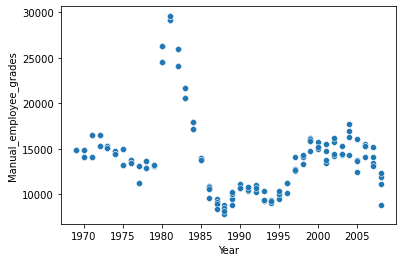

In [285]:
sns.scatterplot(x='Year', y='Manual_employee_grades', data=df)
plt.show()

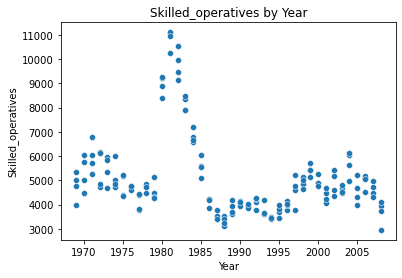

In [286]:
sns.scatterplot(x='Year', y='Skilled_operatives', data=df)
plt.title('Skilled_operatives by Year')
plt.show()

In [287]:
df[["Clerical_employees_female","Clerical_employees_male"]].plot(kind='hist')

In [288]:
#sns.pairplot(df)
#plt.show()

## Features selection Using Pearson Correlation

In [289]:
df.head()

Year Quarter  Manual_employee_grades  Skilled_operatives  Apprentices   
0  1969      Q1                   14893                5024         1279  \
1  1969      Q2                   14893                5338         1279   
2  1969      Q3                   14893                4753         1279   
3  1969      Q4                   14893                3964         1279   
4  1970      Q1                   14893                6029         1279   

   Semi_skilled_adults  Clerical_employees_female  Clerical_employees_male   
0                 7009                        443                      564  \
1                 7659                        443                      564   
2                 7545                        443                      564   
3                 5906                        443                      564   
4                 8371                        443                      564   

   Foremen_and_supervisors  Clerical_and_Operatives  
0                      990                    15900  
1                      990                    15900  
2                      990                    15900  
3                      990                    15900  
4                      990                    15900

In [290]:
df1 = df.drop(['Quarter'], axis=1)

In [291]:
X = df1.drop(['Manual_employee_grades'], axis=1)

In [292]:
y = df1[['Manual_employee_grades']]

In [293]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((112, 8), (48, 8))

In [294]:
corr = X_train.corr()
corr

Year  Skilled_operatives  Apprentices   
Year                       1.000000           -0.256154    -0.034650  \
Skilled_operatives        -0.256154            1.000000     0.910824   
Apprentices               -0.034650            0.910824     1.000000   
Semi_skilled_adults       -0.409132            0.894726     0.781653   
Clerical_employees_female  0.758897            0.319369     0.485887   
Clerical_employees_male   -0.512346            0.777927     0.660719   
Foremen_and_supervisors    0.619768            0.506502     0.655330   
Clerical_and_Operatives   -0.183077            0.955922     0.930565   

                           Semi_skilled_adults  Clerical_employees_female   
Year                                 -0.409132                   0.758897  \
Skilled_operatives                    0.894726                   0.319369   
Apprentices                           0.781653                   0.485887   
Semi_skilled_adults                   1.000000                   0.222735   
Clerical_employees_female             0.222735                   1.000000   
Clerical_employees_male               0.866711                   0.096493   
Foremen_and_supervisors               0.403488                   0.953472   
Clerical_and_Operatives               0.930190                   0.440377   

                           Clerical_employees_male  Foremen_and_supervisors   
Year                                     -0.512346                 0.619768  \
Skilled_operatives                        0.777927                 0.506502   
Apprentices                               0.660719                 0.655330   
Semi_skilled_adults                       0.866711                 0.403488   
Clerical_employees_female                 0.096493                 0.953472   
Clerical_employees_male                   1.000000                 0.217843   
Foremen_and_supervisors                   0.217843                 1.000000   
Clerical_and_Operatives                   0.810030                 0.620348   

                           Clerical_and_Operatives  
Year                                     -0.183077  
Skilled_operatives                        0.955922  
Apprentices                               0.930565  
Semi_skilled_adults                       0.930190  
Clerical_employees_female                 0.440377  
Clerical_employees_male                   0.810030  
Foremen_and_supervisors                   0.620348  
Clerical_and_Operatives                   1.000000

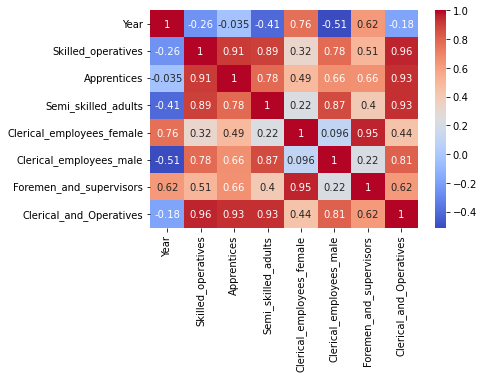

In [295]:
sns.heatmap(corr, annot=True, cmap='coolwarm');

In [296]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature
def correlation(df1, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = df1.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [297]:
corr_features = correlation(X_train, 0.85)
len(set(corr_features))

5

In [298]:
corr_features

{'Apprentices',
 'Clerical_and_Operatives',
 'Clerical_employees_male',
 'Foremen_and_supervisors',
 'Semi_skilled_adults'}

In [299]:
X_train = X_train.drop(corr_features,axis=1)
X_test = X_test.drop(corr_features,axis=1)

In [300]:
X_train.columns

Index(['Year', 'Skilled_operatives', 'Clerical_employees_female'], dtype='object')

## Fearture selection using Lasso regression method

In [301]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [302]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.020, random_state=0))

In [303]:
feature_sel_model.fit(X, y)

SelectFromModel(estimator=Lasso(alpha=0.02, random_state=0))

In [304]:
feature_sel_model.get_support()

array([False,  True,  True,  True,  True,  True,  True,  True])

In [305]:
selected_feat = X.columns[(feature_sel_model.get_support())]
selected_feat

Index(['Skilled_operatives', 'Apprentices', 'Semi_skilled_adults',
       'Clerical_employees_female', 'Clerical_employees_male',
       'Foremen_and_supervisors', 'Clerical_and_Operatives'],
      dtype='object')

In [306]:
#df_tsa = df.to_csv('df_tsa.csv', index=False) 

## Outlier detection

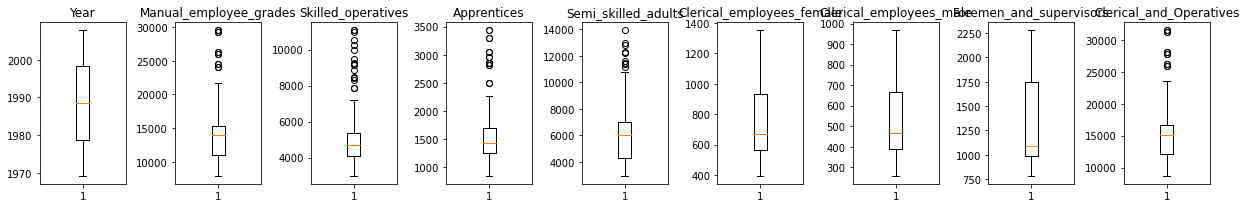

Number of outliers per column:
Year                          0
Manual_employee_grades       12
Skilled_operatives           16
Apprentices                  16
Semi_skilled_adults           9
Clerical_employees_female     0
Clerical_employees_male       0
Foremen_and_supervisors       0
Clerical_and_Operatives      12
dtype: int64
Dataframe with outliers removed:
     Year  Manual_employee_grades  Skilled_operatives  Apprentices   
0    1969                 14893.0              5024.0       1279.0  \
1    1969                 14893.0              5338.0       1279.0   
2    1969                 14893.0              4753.0       1279.0   
3    1969                 14893.0              3964.0       1279.0   
4    1970                 14893.0              6029.0       1279.0   
..    ...                     ...                 ...          ...   
155  2007                 13134.0              4316.0       1397.0   
156  2008                 11951.0              3934.0       1097.0   
157  

In [307]:
import pandas as pd
import matplotlib.pyplot as plt

# Select numeric columns
numeric_cols = df1.select_dtypes(include='number')

# Calculate the lower and upper bounds for outliers (using IQR method)
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers for each numeric column
outliers = ((numeric_cols < lower_bound) | (numeric_cols > upper_bound))

# Create box plots for each numeric column
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols.columns), figsize=(17, 3))

for i, col in enumerate(numeric_cols.columns):
    axes[i].boxplot(numeric_cols[col])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

# Print the number of outliers for each numeric column
print("Number of outliers per column:")
outlier_counts = outliers.sum()
print(outlier_counts)

# Remove outliers from the dataframe
df1_no_outlier = df1.copy()
df1_no_outlier[outliers] = pd.NA

# Print the dataframe with outliers removed
print("Dataframe with outliers removed:")
print(df1_no_outlier)


In [308]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

In [309]:
df1_no_outlier = remove_outliers(df1, 'Clerical_and_Operatives')
df1_no_outlier

Year  Manual_employee_grades  Skilled_operatives  Apprentices   
0    1969                   14893                5024         1279  \
1    1969                   14893                5338         1279   
2    1969                   14893                4753         1279   
3    1969                   14893                3964         1279   
4    1970                   14893                6029         1279   
..    ...                     ...                 ...          ...   
155  2007                   13134                4316         1397   
156  2008                   11951                3934         1097   
157  2008                   12320                4117         1247   
158  2008                   11154                3730         1302   
159  2008                    8811                2951          838   

     Semi_skilled_adults  Clerical_employees_female  Clerical_employees_male   
0                   7009                        443                      564  \
1                   7659                        443                      564   
2                   7545                        443                      564   
3                   5906                        443                      564   
4                   8371                        443                      564   
..                   ...                        ...                      ...   
155                 5469                       1119                      541   
156                 5260                       1126                      546   
157                 5236                       1148                      519   
158                 4526                       1029                      445   
159                 3572                        951                      398   

     Foremen_and_supervisors  Clerical_and_Operatives  
0                        990                    15900  
1                        990                    15900  
2                        990                    15900  
3                        990                    15900  
4                        990                    15900  
..                       ...                      ...  
155                     1882                    14794  
156                     1608                    13623  
157                     1618                    13987  
158                     1540                    12628  
159                     1418                    10160  

[148 rows x 9 columns]

In [310]:
df1_no_outlier.shape

(148, 9)

## Section 6: Descriptive Statistics

In [311]:
#df1=df.drop(["Quarter","Year"], axis=1)

In [312]:
df1.describe()

Year  Manual_employee_grades  Skilled_operatives  Apprentices   
count   160.000000              160.000000          160.000000   160.000000  \
mean   1988.500000            14288.206250         5104.537500  1588.125000   
std      11.579639             4459.152117         1685.199807   546.545121   
min    1969.000000             7861.000000         2951.000000   838.000000   
25%    1978.750000            11011.250000         4065.000000  1259.500000   
50%    1988.500000            14040.000000         4700.500000  1428.500000   
75%    1998.250000            15298.000000         5370.750000  1701.250000   
max    2008.000000            29588.000000        11110.000000  3444.000000   

       Semi_skilled_adults  Clerical_employees_female   
count           160.000000                 160.000000  \
mean           6148.687500                 754.987500   
std            2259.401672                 240.414893   
min            2888.000000                 391.000000   
25%            4265.000000                 565.750000   
50%            6029.000000                 673.000000   
75%            7018.000000                 936.500000   
max           13978.000000                1356.000000   

       Clerical_employees_male  Foremen_and_supervisors   
count               160.000000               160.000000  \
mean                537.425000              1337.237500   
std                 189.883663               431.097582   
min                 255.000000               777.000000   
25%                 389.000000               984.000000   
50%                 466.000000              1091.000000   
75%                 668.000000              1746.000000   
max                 970.000000              2284.000000   

       Clerical_and_Operatives  
count               160.000000  
mean              15580.600000  
std                4712.700903  
min                8624.000000  
25%               12063.000000  
50%               15174.000000  
75%               16747.000000  
max               31568.000000

In [313]:
df1.mean()

Year                          1988.50000
Manual_employee_grades       14288.20625
Skilled_operatives            5104.53750
Apprentices                   1588.12500
Semi_skilled_adults           6148.68750
Clerical_employees_female      754.98750
Clerical_employees_male        537.42500
Foremen_and_supervisors       1337.23750
Clerical_and_Operatives      15580.60000
dtype: float64

In [314]:
df1.median()

Year                          1988.5
Manual_employee_grades       14040.0
Skilled_operatives            4700.5
Apprentices                   1428.5
Semi_skilled_adults           6029.0
Clerical_employees_female      673.0
Clerical_employees_male        466.0
Foremen_and_supervisors       1091.0
Clerical_and_Operatives      15174.0
dtype: float64

In [315]:
#df1.mode()

In [316]:
df1.std()

Year                           11.579639
Manual_employee_grades       4459.152117
Skilled_operatives           1685.199807
Apprentices                   546.545121
Semi_skilled_adults          2259.401672
Clerical_employees_female     240.414893
Clerical_employees_male       189.883663
Foremen_and_supervisors       431.097582
Clerical_and_Operatives      4712.700903
dtype: float64

In [317]:
df1.nunique(axis = 0)

Year                          40
Manual_employee_grades       121
Skilled_operatives           157
Apprentices                  117
Semi_skilled_adults          158
Clerical_employees_female    113
Clerical_employees_male      103
Foremen_and_supervisors      116
Clerical_and_Operatives      121
dtype: int64

In [318]:
df1.skew()

Year                         0.000000
Manual_employee_grades       1.562790
Skilled_operatives           1.895506
Apprentices                  1.659662
Semi_skilled_adults          1.078326
Clerical_employees_female    0.556033
Clerical_employees_male      0.690206
Foremen_and_supervisors      0.487853
Clerical_and_Operatives      1.499181
dtype: float64

In [319]:
df1.kurtosis()

Year                        -1.201452
Manual_employee_grades       2.883738
Skilled_operatives           3.442709
Apprentices                  2.586943
Semi_skilled_adults          1.266436
Clerical_employees_female   -0.832231
Clerical_employees_male     -0.664665
Foremen_and_supervisors     -1.264932
Clerical_and_Operatives      2.686788
dtype: float64

### Finding each variable data distribution.

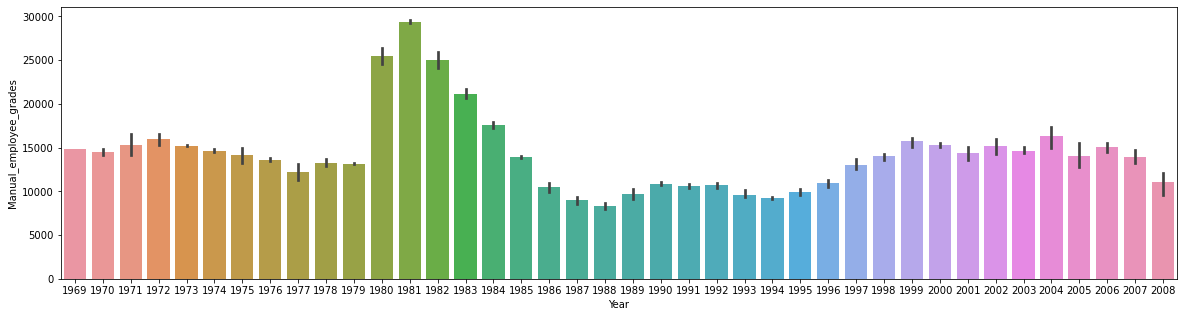

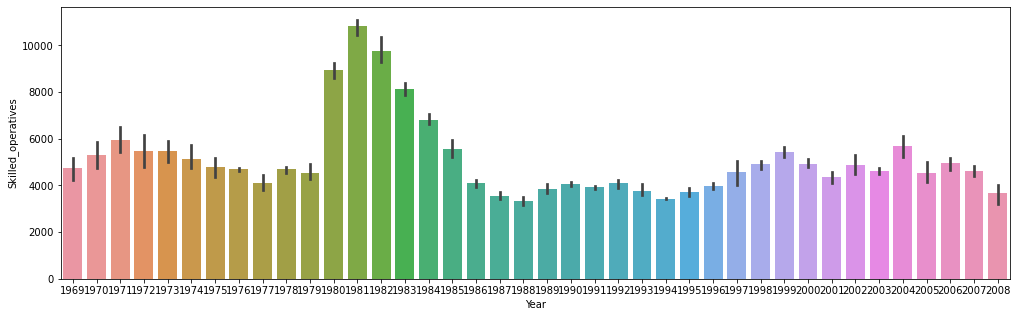

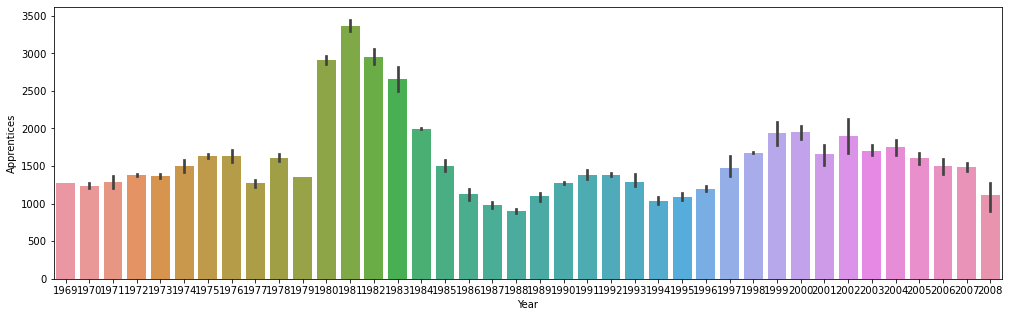

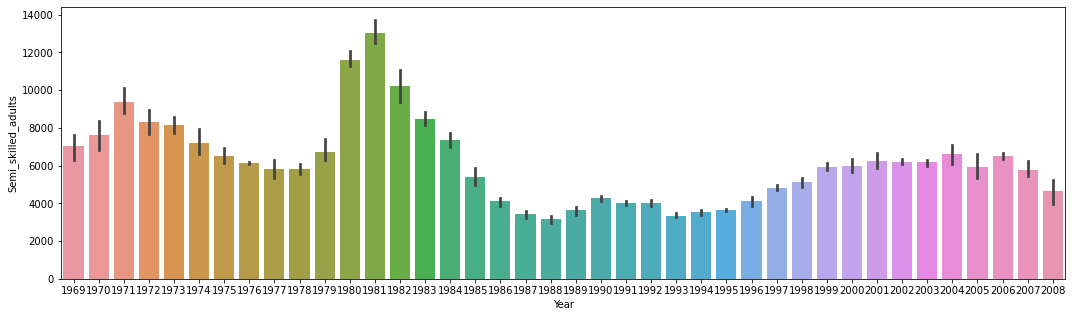

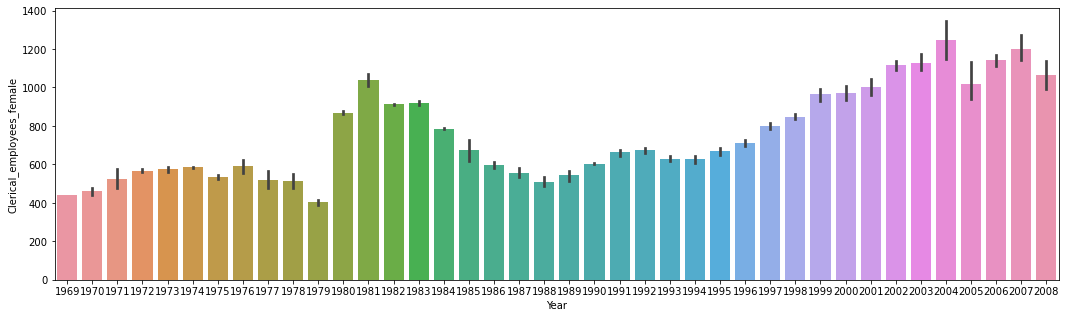

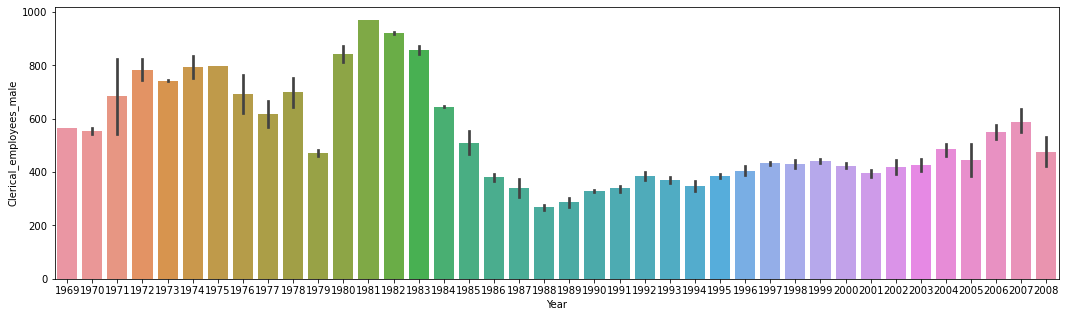

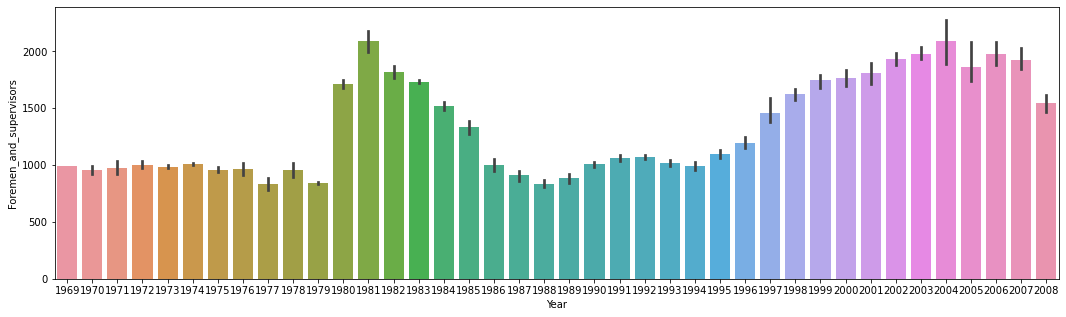

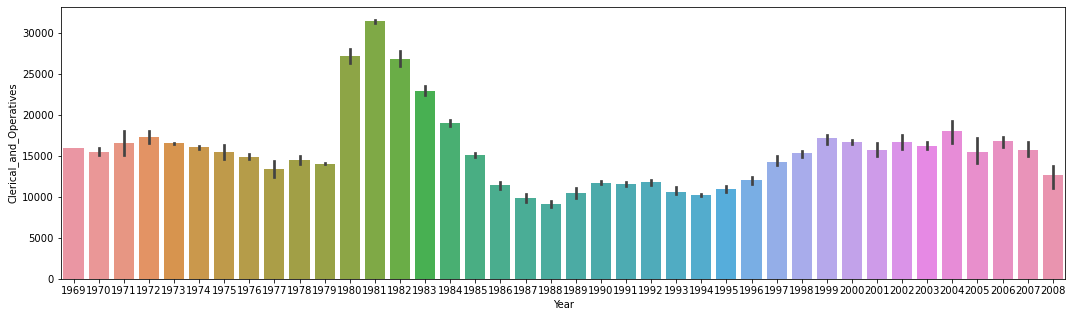

In [320]:
from matplotlib import pyplot as plt
import seaborn as sns

def plot_bar(df, x_col, y_col, figsize=(20, 5)):
    plt.figure(figsize=figsize)
    ax = sns.barplot(x=x_col, y=y_col, data=df)

# Call the function for each plot
plot_bar(df, "Year", "Manual_employee_grades")
plot_bar(df, "Year", "Skilled_operatives", figsize=(17, 5))
plot_bar(df, "Year", "Apprentices", figsize=(17, 5))
plot_bar(df, "Year", "Semi_skilled_adults", figsize=(18, 5))
plot_bar(df, "Year", "Clerical_employees_female", figsize=(18, 5))
plot_bar(df, "Year", "Clerical_employees_male", figsize=(18, 5))
plot_bar(df, "Year", "Foremen_and_supervisors", figsize=(18, 5))
plot_bar(df, "Year", "Clerical_and_Operatives", figsize=(18, 5))


## Section 7: Inferential statistics

## Parametric Tests

In [321]:
import scipy.stats as stats
import statsmodels.api as sm

# 1. T-Test One Population - Employer type Apprentices Earnings per week
## if p-value < 0.05  we reject Ho
## if p-value > 0.05 we accept tht Ho 


print("1. T-Test One Population - Employer type Apprentices Earnings per week")
mean_apprentices = df["Apprentices"].mean()
print("Mean Apprentices Earnings per week:", mean_apprentices)
t_stat, p_value = stats.ttest_1samp(df["Apprentices"], 1588)
print("T-statistic:", t_stat)
print("P-value:", p_value)
print()

## the p- vlaue is 0.9976 is greater than 0.05 so we accept Ho 
## We accept H0 ---> We reject H1, 
## so there is enough evidence to say that the average Earnings of Apprentices is 1588 Euros at a 5% significance level..


## 2. T-Test - Two populations Weekly earning of female employees in Q1 and Q4

print("2. T-Test - Two populations Weekly earning of female employees in Q1 and Q4")
Q1 = df.loc[df['Quarter'] == "Q1", 'Clerical_employees_female']
Q4 = df.loc[df['Quarter'] == "Q4", 'Clerical_employees_female']
t_stat, p_value = stats.ttest_ind(Q1, Q4, equal_var=True)
print("T-statistic:", t_stat)
print("P-value:", p_value)
print()

##  statistic=0.27636448289947246 is the t value = 0.78
## p-value 0.78 is > alpha 0.05 so we accept the H0


## 3. Confidence Interval

print("3. Confidence Interval")

X = df["Clerical_employees_female"]

mean = X.mean()
print("The mean is", mean)

confidence_interval = stats.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=stats.sem(X))
print("Confidence Interval:", confidence_interval)
print()

## The population average weekly earnings of clerical employees female is between 717 and 792.


# 4. Shapiro-Wilk test and Levene's test


print("4. Shapiro-Wilk test and Levene's test")
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
for quarter in quarters:
    shapiro_test = stats.shapiro(df.loc[df['Quarter'] == quarter, 'Apprentices'])
    print("Shapiro-Wilk test for", quarter, "Quarter:")
    print("P-value:", shapiro_test.pvalue)
    print()
    
## pvalue < 0.05 so reject the H0 means Apprentices employee earning per week is not normally distributed.

## Homogeinity of variance: Levene's test.
# H0 : Variance between the Quarterly earnings are equal
# H1 : Variance between the Quarterly earnings are not equal

#levene_test = stats.levene(Q1, Q2, Q3, Q4)
#print("Levene's test:")
#print("P-value:", levene_test.pvalue)
#print()

## pvalue=0.9682 > alpha(0.05) we accept the H0

# 5. One-Way ANOVA
import statsmodels.api as sm
from statsmodels.formula.api import ols
print("5. One-Way ANOVA")
model = ols('Apprentices ~ Quarter', data=df).fit()
anova_table = sm.stats.anova_lm(model, type=2)
print("One-Way ANOVA:")
print(anova_table)
print()

## degrees of freedom is (n-1) = 4-1 =3
## F = 0.133 abs
## Pvalue = 0.97
## As Pvalue 0.97 is > alpha(0.05) we accept the H0, means the variance are equal in each Quater earnings. 
# or we don't have reason to belive that there are significant differences between the earnings per quater.

# 6. Two-Way ANOVA
print("6. Two-Way ANOVA")
model2 = ols('Apprentices ~ Clerical_employees_male + Quarter', data=df).fit()
anova_table2 = sm.stats.anova_lm(model2, type=2)
print("Two-Way ANOVA:")
print(anova_table2)


1. T-Test One Population - Employer type Apprentices Earnings per week
Mean Apprentices Earnings per week: 1588.125
T-statistic: 0.0028929703506878277
P-value: 0.9976953733155051

2. T-Test - Two populations Weekly earning of female employees in Q1 and Q4
T-statistic: 0.27636448289947246
P-value: 0.7829991017077986

3. Confidence Interval
The mean is 754.9875
Confidence Interval: (717.4498014281107, 792.5251985718892)

4. Shapiro-Wilk test and Levene's test
Shapiro-Wilk test for Q1 Quarter:
P-value: 9.519153536530212e-06

Shapiro-Wilk test for Q2 Quarter:
P-value: 1.593529486854095e-05

Shapiro-Wilk test for Q3 Quarter:
P-value: 7.810974057065323e-05

Shapiro-Wilk test for Q4 Quarter:
P-value: 3.330539766466245e-05

5. One-Way ANOVA
One-Way ANOVA:
             df       sum_sq       mean_sq         F    PR(>F)
Quarter     3.0     59906.55   19968.85000  0.065671  0.977989
Residual  156.0  47435232.95  304072.00609       NaN       NaN

6. Two-Way ANOVA
Two-Way ANOVA:
                    

## Non-Parametric Tests 

In [322]:
import scipy.stats as stats

# 1. Sign Test

## X= Apply the sign test to compare the median earnings per Quarter between the years 1990 and 2008.

## H0 : The median earnings per Quarter in the construction industry are the same for the years 1990 and 2008.
## H1 : The median earnings per Quarter in the construction industry are different for the years 1990 and 2008.

print("1. Sign Test")

# Subset the data for years 1988 and 2008
df_subset = df[df["Year"].isin([1988, 2008])]

# Calculate the difference in earnings between the years 1988 and 2008
diff = df_subset.loc[df_subset["Year"] == 2008, "Manual_employee_grades"].iloc[0] - \
       df_subset.loc[df_subset["Year"] == 1988, "Manual_employee_grades"].iloc[0]

# Create a new column to indicate the sign of the difference
df_subset["diff_sign"] = df_subset["Manual_employee_grades"].apply(lambda x: "+" if x > diff else "-" if x < diff else "0")

# Count the number of positive and negative differences
counts = df_subset["diff_sign"].value_counts()

# Calculate the p-value
p_value = stats.binom_test(counts, n=counts.sum(), p=0.5)

# Display the results
print(f"Test statistic: {counts}")
print(f"P-value: {p_value}")
print()

## Accroding to the pvalue 0.0078125 < alpha(0.05) we reject the H0, 
## means there is no evidence to say that the employee earnings per week is same in year 1988 and 2008.

# 2. Kruskal-Wallis H test

## X = To verify any difference in Quarterly earnings in Q1 and Q4

## H0: there is no difference in Quarterly earnings in Quater1 to Q4
## H1: there is at least one of the Quarterly earnings has differences 


print("2. Kruskal-Wallis H test")

# Group the data by quarter
q1 = df.loc[df['Quarter'] == 'Q1']['Skilled_operatives']
q2 = df.loc[df['Quarter'] == 'Q2']['Skilled_operatives']
q3 = df.loc[df['Quarter'] == 'Q3']['Skilled_operatives']
q4 = df.loc[df['Quarter'] == 'Q4']['Skilled_operatives']

# Perform the Kruskal-Wallis H test
stat, p_value = stats.kruskal(q1, q2, q3, q4)

# Display the results
print('Kruskal-Wallis H Test Results:')
print('Test Statistic: {:.4f}'.format(stat))
print('P-value: {:.4f}'.format(p_value))

if p_value < 0.05:
    print('There is a significant difference between the quarters.')
else:
    print('There is no significant difference between the quarters.')
print()

## According to the results Pvalue 0.6715 is > alpha(0.05) so we accept the H0,
## means There is no significant difference between the Skilled_operatives Quarterly earnings in Q1 and Q4

# 3. U-Mann Whitney test

## X = To verify Quarterly earnings of Clerical_employees_female and Clerical_employees_male

## H0: There is no difference in the Quarterly earnings of Clerical_employees_female and Clerical_employees_male
## H1: There is a difference in the Quarterly earnings of Clerical_employees_female and Clerical_employees_male

print("3. U-Mann Whitney test")

# Subset the data for Clerical_employees_female and Clerical_employees_male
df2 = df[['Clerical_employees_female', 'Clerical_employees_male']]

# Perform the U-Mann Whitney test
stat, p_value = stats.mannwhitneyu(df2['Clerical_employees_female'], df2['Clerical_employees_male'])

# Display the results
print('U-Mann Whitney Test Results:')
print('Test Statistic: {:.4f}'.format(stat))
print('P-value: {:.4f}'.format(p_value))

if p_value < 0.05:
    print('There is a significant difference between the earnings of Clerical_employees_female and Clerical_employees_male.')
else:
    print('There is no significant difference between the earnings of Clerical_employees_female and Clerical_employees_male.')
    

## according to the results pvalue 0.00 is < alpha(0.05) so we reject the H0,
## means there is no evidence to say that no significance difference in the weekly earnings of Clerical_employees_female and Clerical_employees_male

1. Sign Test
Test statistic: diff_sign
+    8
Name: count, dtype: int64
P-value: 0.0078125

2. Kruskal-Wallis H test
Kruskal-Wallis H Test Results:
Test Statistic: 1.5468
P-value: 0.6715
There is no significant difference between the quarters.

3. U-Mann Whitney test
U-Mann Whitney Test Results:
Test Statistic: 19800.5000
P-value: 0.0000
There is a significant difference between the earnings of Clerical_employees_female and Clerical_employees_male.


## Section 8 : Machine Learning Models

In [335]:
df1.head()

Skilled_operatives  Apprentices  Semi_skilled_adults   
0                5024         1279                 7009  \
1                5338         1279                 7659   
2                4753         1279                 7545   
3                3964         1279                 5906   
4                6029         1279                 8371   

   Clerical_employees_female  Clerical_employees_male   
0                        443                      564  \
1                        443                      564   
2                        443                      564   
3                        443                      564   
4                        443                      564   

   Foremen_and_supervisors  Clerical_and_Operatives  
0                      990                    15900  
1                      990                    15900  
2                      990                    15900  
3                      990                    15900  
4                      990                    15900

In [329]:
df1=df1.drop(["Year","Manual_employee_grades"], axis=1)

In [330]:
## Important features selected from Lasso regression model.
##('Skilled_operatives', 'Apprentices', 'Semi_skilled_adults', 'Clerical_employees_female', 'Clerical_employees_male',
##'Foremen_and_supervisors', 'Clerical_and_Operatives')

Linear Regression:
RMSE: 364.8597687348036
R-squared: 0.9534548584387907
Decision Trees:
RMSE: 236.33860772205628
R-squared: 0.9804704721432225
Random Forests:
RMSE: 227.47932890979345
R-squared: 0.9819071794737199
K-Nearest Neighbors (KNN):
RMSE: 338.3716932276957
R-squared: 0.9599677087503621
Support Vector Machines (SVM):
RMSE: 338.3716932276957
R-squared: 0.9599677087503621


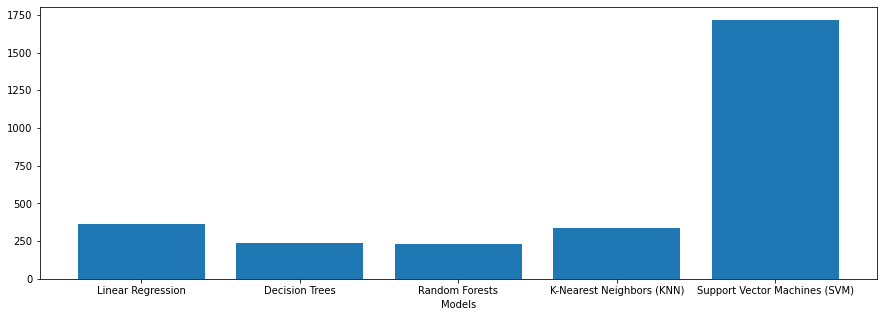

In [334]:
## Difine the target variable as Skilled_operatives.

X = df1.drop("Skilled_operatives", axis=1) 
y = df1["Skilled_operatives"]

## Split the dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Normalize the data
scaler = MinMaxScaler()
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

## Model 1: Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train_normalized, y_train)
linear_predictions = linear_model.predict(X_test_normalized)
linear_rmse = mean_squared_error(y_test, linear_predictions, squared=False)
linear_r2 = r2_score(y_test, linear_predictions)
print("Linear Regression:")
print("RMSE:", linear_rmse)
print("R-squared:", linear_r2)

# Model 2: Decision Trees
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train_normalized, y_train)
tree_predictions = tree_model.predict(X_test_normalized)
tree_rmse = mean_squared_error(y_test, tree_predictions, squared=False)
tree_r2 = r2_score(y_test, tree_predictions)
print("Decision Trees:")
print("RMSE:", tree_rmse)
print("R-squared:", tree_r2)

## Model 3: Random Forests
forest_model = RandomForestRegressor()
forest_model.fit(X_train_normalized, y_train)
forest_predictions = forest_model.predict(X_test_normalized)
forest_rmse = mean_squared_error(y_test, forest_predictions, squared=False)
forest_r2 = r2_score(y_test, forest_predictions)
print("Random Forests:")
print("RMSE:", forest_rmse)
print("R-squared:", forest_r2)

# Model 4: K-Nearest Neighbors (KNN)
knn_model = KNeighborsRegressor()

# Hyperparameter tuning using GridSearchCV
param_grid = {'n_neighbors': [3, 5, 7]}  
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train_normalized, y_train)
knn_predictions = grid_search.predict(X_test_normalized)
knn_rmse = mean_squared_error(y_test, knn_predictions, squared=False)
knn_r2 = r2_score(y_test, knn_predictions)
print("K-Nearest Neighbors (KNN):")
print("RMSE:", knn_rmse)
print("R-squared:", knn_r2)

# Model 5: Support Vector Machines (SVM)
svm_model = SVR()
svm_model.fit(X_train_normalized, y_train)
svm_predictions = svm_model.predict(X_test_normalized)
svm_rmse = mean_squared_error(y_test, svm_predictions, squared=False)
svm_r2 = r2_score(y_test, svm_predictions)
print("Support Vector Machines (SVM):")
print("RMSE:", knn_rmse)
print("R-squared:", knn_r2)


# Visualization of the results

models = ['Linear Regression', 'Decision Trees', 'Random Forests', 'K-Nearest Neighbors (KNN)', 'Support Vector Machines (SVM)']
rmse_scores = [linear_rmse, tree_rmse, forest_rmse, knn_rmse, svm_rmse]
r2_scores = [linear_r2, tree_r2, forest_r2, knn_r2, svm_r2]
plt.figure(figsize=(15, 5))
plt.bar(models, rmse_scores)
plt.xlabel('Models')
plt.ylabel;


## Section 9: Time Series Analys on forecasting "Clerical_employees_female" earnings per Quarter

In [95]:
# Read the data from the CSV file
df = pd.read_csv("df_tsa.csv", index_col='date', parse_dates=True)

In [96]:
# Select the column of interest
df = df[['Clerical_employees_female']]
df.head()

Clerical_employees_female
date                                 
1969-01-01                        443
1969-04-01                        443
1969-07-01                        443
1969-10-01                        443
1970-01-01                        443

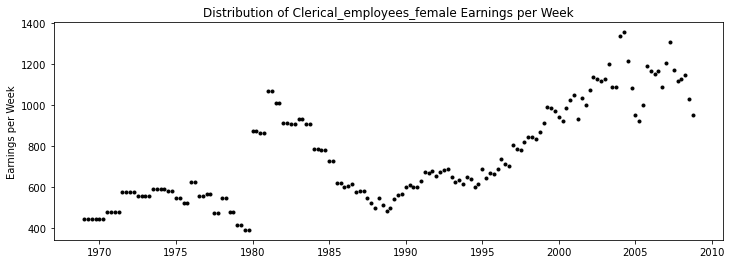

In [97]:
import matplotlib.pyplot as plt

# Convert index and data to numpy arrays
index = df.index.to_numpy()
data = df['Clerical_employees_female'].to_numpy()

# Plot the distribution of earnings per week
plt.figure(figsize=(12, 4))
plt.plot(index, data, 'k.')
plt.ylabel('Earnings per Week')
plt.title('Distribution of Clerical_employees_female Earnings per Week')
plt.show()


In [98]:
# Smoothing the time series using moving average (MA)
df_ma = df.rolling(window=15).mean()

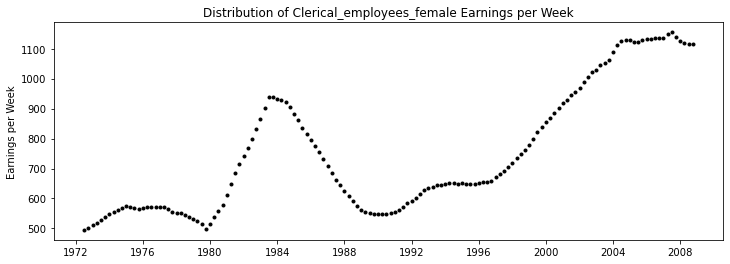

In [99]:
import matplotlib.pyplot as plt

# Convert index and data to numpy arrays
index = df.index.to_numpy()
data = df_ma['Clerical_employees_female'].to_numpy()

# Plot the distribution of earnings per week
plt.figure(figsize=(12, 4))
plt.plot(index, data, 'k.')
plt.ylabel('Earnings per Week')
plt.title('Distribution of Clerical_employees_female Earnings per Week')
plt.show()


In [100]:
# Perform the Augmented Dickey-Fuller test
def ad_test(df):
    dftest = sm.tsa.stattools.adfuller(df, autolag='AIC')
    print("1. ADF:", dftest[0])
    print("2. P-Value:", dftest[1])
    print("3. Num Of Lags:", dftest[2])
    print("4. Num Of Observations Used For ADF Regression:", dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t", key, ":", val)

ad_test(df['Clerical_employees_female'])

1. ADF: -1.6966499148367256
2. P-Value: 0.43283936290703573
3. Num Of Lags: 2
4. Num Of Observations Used For ADF Regression: 157
5. Critical Values:
	 1% : -3.472703119504854
	 5% : -2.880131672353732
	 10% : -2.5766826861130268


In [101]:
# Create a naive base model
df_base = pd.concat([df, df.shift(1)], axis=1).dropna()
df_base.columns = ['Clerical_employees_female_Act', 'Clerical_employees_female_Forecast']
df_error = mean_squared_error(df_base['Clerical_employees_female_Act'], df_base['Clerical_employees_female_Forecast'])
print("Mean Squared Error:", df_error)
print("Root Mean Squared Error:", np.sqrt(df_error))

Mean Squared Error: 4527.786163522012
Root Mean Squared Error: 67.2888264388822


In [102]:
from statsmodels.tsa.arima_model import ARIMA ## Autoregressive(p) Integrated(d) Moving Average(q)

In [103]:
df.tail(1)

Clerical_employees_female
date                                 
2008-10-01                        951

In [104]:
print(df.shape)
train=df.iloc[:-60]
test=df.iloc[-60:]
print(train.shape,test.shape)

(160, 1)
(100, 1) (60, 1)


In [105]:
model = sm.tsa.ARIMA(train, order=(0, 1, 0));

C:\Users\Omprakash vootla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\Omprakash vootla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.

C:\Users\Omprakash vootla\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency QS-OCT will be used.



In [106]:
model_fit = model.fit()

In [107]:
model_fit.aic ## information criteria

1103.2834504750638

In [108]:
df_forecast = model_fit.forecast(steps=60);

In [109]:
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(test, df_forecast)))

Root Mean Squared Error: 402.78108197878413


In [110]:
pred=model_fit.predict(start=len(df), end=len(df)+60, type='levels').rename('ARIMA predictions')
print(pred)

2009-01-01    616.0
2009-04-01    616.0
2009-07-01    616.0
2009-10-01    616.0
2010-01-01    616.0
              ...  
2023-01-01    616.0
2023-04-01    616.0
2023-07-01    616.0
2023-10-01    616.0
2024-01-01    616.0
Freq: QS-OCT, Name: ARIMA predictions, Length: 61, dtype: float64


Text(0, 0.5, 'Clerical_employees_female')

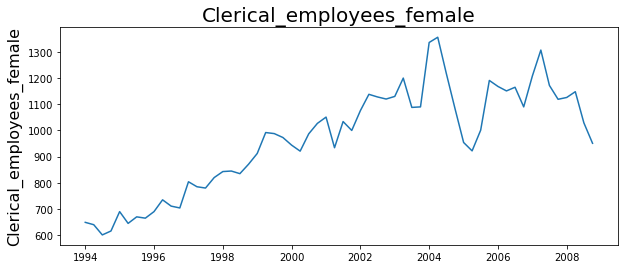

In [111]:
plt.figure(figsize=(10,4))
plt.plot(test)
plt.title('Clerical_employees_female', fontsize=20)
plt.ylabel('Clerical_employees_female', fontsize=16)


Text(0, 0.5, 'Clerical_employees_female earnings')

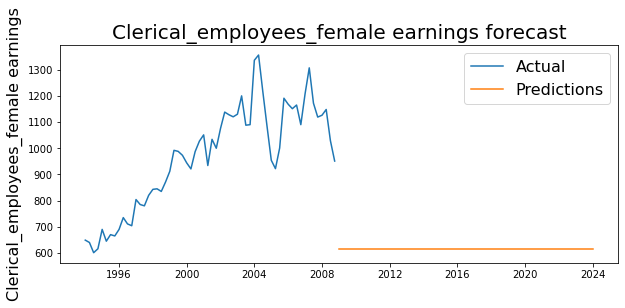

In [112]:
plt.figure(figsize=(10,4))
plt.plot(test)
plt.plot(pred)
plt.legend(('Actual', 'Predictions'), fontsize=16)
plt.title('Clerical_employees_female earnings forecast', fontsize=20)
plt.ylabel('Clerical_employees_female earnings', fontsize=16)

## 2. Portugal Data Set: Number of employees per Quarter in Construction Industry.

## Section 10: Data collection

In [113]:
# Read the CSV file into a pandas dataframe
df = pd.read_csv("PRT_Q-filtered-2023-05-26.csv")

In [114]:
# Display the first two rows of the dataframe
df.head(2)

ref_area.label                               indicator.label   
0       Portugal  Employment by sex and occupation (thousands)  \
1       Portugal  Employment by sex and occupation (thousands)   

                   source.label   sex.label   
0  LFS - EU Labour Force Survey  Sex: Total  \
1  LFS - EU Labour Force Survey  Sex: Total   

                                      classif1.label  classif2.label    time   
0  Occupation (Skill level): Skill levels 3 and 4...             NaN  2022Q4  \
1   Occupation (Skill level): Skill level 2 ~ medium             NaN  2022Q4   

   obs_value obs_status.label  note_classif.label  note_indicator.label   
0     1944.0              NaN                 NaN  Frequency: Quarterly  \
1     2513.0              NaN                 NaN  Frequency: Quarterly   

   note_source.label  
0                NaN  
1                NaN

In [115]:
# Display the last two rows of the dataframe
df.tail(2)

ref_area.label                               indicator.label   
1150       Portugal  Employment by sex and occupation (thousands)  \
1151       Portugal  Employment by sex and occupation (thousands)   

                      source.label    sex.label   
1150  LFS - EU Labour Force Survey  Sex: Female  \
1151  LFS - EU Labour Force Survey  Sex: Female   

                                         classif1.label  classif2.label   
1150  Occupation (ISCO-08): 4. Clerical support workers             NaN  \
1151  Occupation (ISCO-08): 7. Craft and related tra...             NaN   

        time  obs_value obs_status.label  note_classif.label   
1150  2011Q1      269.0  Break in series                 NaN  \
1151  2011Q1      126.0  Break in series                 NaN   

                                   note_indicator.label  note_source.label  
1150  Frequency: Quarterly | Break in series: Method...                NaN  
1151  Frequency: Quarterly | Break in series: Method...                NaN

In [116]:
# Check the number of rows and columns in the dataframe
df.shape

(1152, 12)

In [117]:
# Check for missing values in the dataframe
df.isnull().sum()

ref_area.label           144
indicator.label          144
source.label             144
sex.label                144
classif1.label           144
classif2.label          1152
time                     144
obs_value                144
obs_status.label        1089
note_classif.label      1152
note_indicator.label     144
note_source.label       1152
dtype: int64

## Section 11: Data Preparation

In [118]:
# Drop unwanted columns from the dataframe
df = df.drop(["indicator.label", "ref_area.label", "source.label", "classif2.label", "obs_status.label", "note_classif.label", "note_indicator.label", "note_source.label"], axis=1)

In [119]:
# Select only the desired columns in the dataframe
df = df[["sex.label", "classif1.label", "time", "obs_value"]]

In [120]:
# Verify column labels with count
label_counts = df['sex.label'].value_counts()
print(label_counts)

sex.label
Sex: Total     336
Sex: Male      336
Sex: Female    336
Name: count, dtype: int64


In [121]:
# Remove rows with 'Sex: Total' in the 'sex.label' column
df = df[df['sex.label'] != 'Sex: Total']

In [122]:
# Check unique values in columns
print(df["sex.label"].unique())
print(df["classif1.label"].unique())
print(df["time"].unique())

['Sex: Male' 'Sex: Female' nan]
['Occupation (Skill level): Skill levels 3 and 4 ~ high'
 'Occupation (Skill level): Skill level 2 ~ medium'
 'Occupation (Skill level): Skill level 1 ~ low' nan
 'Occupation (ISCO-08): 1. Managers'
 'Occupation (ISCO-08): 3. Technicians and associate professionals'
 'Occupation (ISCO-08): 4. Clerical support workers'
 'Occupation (ISCO-08): 7. Craft and related trades workers']
['2022Q4' nan '2022Q3' '2022Q2' '2022Q1' '2021Q4' '2021Q3' '2021Q2'
 '2021Q1' '2020Q4' '2020Q3' '2020Q2' '2020Q1' '2019Q4' '2019Q3' '2019Q2'
 '2019Q1' '2018Q4' '2018Q3' '2018Q2' '2018Q1' '2017Q4' '2017Q3' '2017Q2'
 '2017Q1' '2016Q4' '2016Q3' '2016Q2' '2016Q1' '2015Q4' '2015Q3' '2015Q2'
 '2015Q1' '2014Q4' '2014Q3' '2014Q2' '2014Q1' '2013Q4' '2013Q3' '2013Q2'
 '2013Q1' '2012Q4' '2012Q3' '2012Q2' '2012Q1' '2011Q4' '2011Q3' '2011Q2'
 '2011Q1']


In [123]:
# Rename columns
df = df.rename(columns={'time': 'Year_Quarter', 'obs_value': 'Number_of_employees', 'Clerical support workers': 'Clerical_support_workers',
                        'Skill levels 3 and 4 ~ high': 'Skill_levels_high', 'Skill level 2 ~ medium': 'Skill_level_medium',
                        'Skill level 1 ~ low': 'Skill_level_low'})

In [124]:
# Create new dataframe with columns for each label, initialized with zeros
new_df = pd.DataFrame(0, index=df.index, columns=['Managers', 'Technicians', 'Clerical_workers', 'trades_workers', 'Skill levels 3 and 4 ~ high', 'Skill level 2 ~ medium', 'Skill level 1 ~ low'])

In [125]:
# Loop through each row of the original dataframe
for index, row in df.iterrows():
    label = row['classif1.label']
    if label == 'Occupation (ISCO-08): 4. Clerical support workers':
        new_df.at[index, 'Clerical_workers'] = 1
    elif label == 'Occupation (ISCO-08): 1. Managers':
        new_df.at[index, 'Managers'] = 1
    elif label == 'Occupation (ISCO-08): 3. Technicians and associate professionals':
        new_df.at[index, 'Technicians'] = 1
    elif label == 'Occupation (ISCO-08): 7. Craft and related trades workers':
        new_df.at[index, 'trades_workers'] = 1
    elif label == 'Occupation (Skill level): Skill levels 3 and 4 ~ high':
        new_df.at[index, 'Skill levels 3 and 4 ~ high'] = 1
    elif label == 'Occupation (Skill level): Skill level 2 ~ medium':
        new_df.at[index, 'Skill level 2 ~ medium'] = 1
    elif label == 'Occupation (Skill level): Skill level 1 ~ low':
        new_df.at[index, 'Skill level 1 ~ low'] = 1


In [126]:
# Concatenate the original dataframe and the new dataframe
result_df = pd.concat([df, new_df], axis=1)

In [127]:
# Drop the original 'classif1.label' column
result_df = result_df.drop(['classif1.label'], axis=1)

In [128]:
# Check for missing values in the resulting dataframe
result_df_missing_values = result_df.isnull().sum()
print(result_df_missing_values)

sex.label                      144
Year_Quarter                   144
Number_of_employees            144
Managers                         0
Technicians                      0
Clerical_workers                 0
trades_workers                   0
Skill levels 3 and 4 ~ high      0
Skill level 2 ~ medium           0
Skill level 1 ~ low              0
dtype: int64


In [129]:
# Fill any missing values with 0
result_df.fillna(0, inplace=True)

In [130]:
# Rearrange the columns in the dataframe
df = result_df[['Year_Quarter', 'sex.label', 'Number_of_employees', 'Managers', 'Technicians', 'Clerical_workers', 'trades_workers', 'Skill levels 3 and 4 ~ high', 'Skill level 2 ~ medium', 'Skill level 1 ~ low']]

In [131]:
# Convert columns to appropriate data types
df["Number_of_employees"] = df["Number_of_employees"].astype(int)
df["Managers"] = df["Managers"].astype(int)
df["Technicians"] = df["Technicians"].astype(int)
df["Clerical_workers"] = df["Clerical_workers"].astype(int)
df["Skill levels 3 and 4 ~ high"] = df["Skill levels 3 and 4 ~ high"].astype(int)
df["Skill level 2 ~ medium"] = df["Skill level 2 ~ medium"].astype(int)
df["Skill level 1 ~ low"] = df["Skill level 1 ~ low"].astype(int)

# Print the final dataframe information
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 3 to 1151
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Year_Quarter                 816 non-null    object
 1   sex.label                    816 non-null    object
 2   Number_of_employees          816 non-null    int32 
 3   Managers                     816 non-null    int32 
 4   Technicians                  816 non-null    int32 
 5   Clerical_workers             816 non-null    int32 
 6   trades_workers               816 non-null    int64 
 7   Skill levels 3 and 4 ~ high  816 non-null    int32 
 8   Skill level 2 ~ medium       816 non-null    int32 
 9   Skill level 1 ~ low          816 non-null    int32 
dtypes: int32(7), int64(1), object(2)
memory usage: 80.1+ KB
None


In [132]:
df.tail()

Year_Quarter    sex.label  Number_of_employees  Managers  Technicians   
1147            0            0                    0         0            0  \
1148       2011Q1  Sex: Female                  101         1            0   
1149       2011Q1  Sex: Female                  154         0            1   
1150       2011Q1  Sex: Female                  269         0            0   
1151       2011Q1  Sex: Female                  126         0            0   

      Clerical_workers  trades_workers  Skill levels 3 and 4 ~ high   
1147                 0               0                            0  \
1148                 0               0                            0   
1149                 0               0                            0   
1150                 1               0                            0   
1151                 0               1                            0   

      Skill level 2 ~ medium  Skill level 1 ~ low  
1147                       0                    0  
1148                       0                    0  
1149                       0                    0  
1150                       0                    0  
1151                       0                    0

In [133]:
df.isnull().sum()

Year_Quarter                   0
sex.label                      0
Number_of_employees            0
Managers                       0
Technicians                    0
Clerical_workers               0
trades_workers                 0
Skill levels 3 and 4 ~ high    0
Skill level 2 ~ medium         0
Skill level 1 ~ low            0
dtype: int64

In [134]:
df['gender'] = df['sex.label'].str.extract('(Male|Female)')

In [135]:
df['male'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['female'] = df['gender'].apply(lambda x: 1 if x == 'Female' else 0)

In [136]:
df.drop(columns=['sex.label', 'gender'], inplace=True)

In [137]:
df.head()

Year_Quarter  Number_of_employees  Managers  Technicians  Clerical_workers   
3       2022Q4                  952         0            0                 0  \
4       2022Q4                 1361         0            0                 0   
5       2022Q4                  135         0            0                 0   
6       2022Q4                  992         0            0                 0   
7       2022Q4                 1152         0            0                 0   

   trades_workers  Skill levels 3 and 4 ~ high  Skill level 2 ~ medium   
3               0                            1                       0  \
4               0                            0                       1   
5               0                            0                       0   
6               0                            1                       0   
7               0                            0                       1   

   Skill level 1 ~ low  male  female  
3                    0     1       0  
4                    0     1       0  
5                    1     1       0  
6                    0     0       1  
7                    0     0       1

In [138]:
## rename the columns in data frame
df=df.rename(columns={'Skill levels 3 and 4 ~ high':'Skill_levels_high', 'Skill level 2 ~ medium':'Skill_level_medium','Skill level 1 ~ low':'Skill_level_low'})

In [139]:
## rearrenge the columns in data frame
df=df[['Year_Quarter','male','female','Number_of_employees','Managers','Technicians','Clerical_workers','trades_workers','Skill_levels_high','Skill_level_medium','Skill_level_low']]

In [140]:
df.head()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
3       2022Q4     1       0                  952         0            0  \
4       2022Q4     1       0                 1361         0            0   
5       2022Q4     1       0                  135         0            0   
6       2022Q4     0       1                  992         0            0   
7       2022Q4     0       1                 1152         0            0   

   Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
3                 0               0                  1                   0  \
4                 0               0                  0                   1   
5                 0               0                  0                   0   
6                 0               0                  1                   0   
7                 0               0                  0                   1   

   Skill_level_low  
3                0  
4                0  
5                1  
6                0  
7                0

In [141]:
df.shape

(816, 11)

In [142]:
#portugal_ml = df.to_csv('portugal_ml.csv', index=False)

##  Statistics for Data Analytics Tasks

## Section 12: Inferential statistics

## 1. T-Test One Population - Number_of_employees in Construction industry in Portugal.

In [143]:
df["Number_of_employees"].mean() ## to find the mean of column "Number_of_employees"

381.73161764705884

In [144]:
X= df["Number_of_employees"];X ## assign the column "Number_of_employees" to objec X

3        952
4       1361
5        135
6        992
7       1152
        ... 
1147       0
1148     101
1149     154
1150     269
1151     126
Name: Number_of_employees, Length: 816, dtype: int32

In [145]:
## setting the Hypothesis for sign test.

#H0 : u = 463
#H1 : u =! 463
stats.ttest_1samp(X,463)

Ttest_1sampResult(statistic=-5.645541878207911, pvalue=2.2736168405374685e-08)

In [146]:
##  statistic=0.016522005465077535 is the t value = 0.01

In [147]:
##  if p-value < 0.05  we reject Ho
## if p-value > 0.05 we accept tht Ho 
## the p- vlaue is 0.973 is greater than 0.05 so we accept Ho

In [148]:
## We accept H0 ---> so there is enough evidence to say that the average Number_of_employees 463,Quarterly.

## 2. T-Test - two populations Qarterly Number of employees in Q1 and Q4 

In [149]:
## create a new data frame with two columns "Year_Quarter", "Number_of_employees"

df1=df[['Year_Quarter','Number_of_employees']]

In [150]:
df1.tail() ## verif the new data frame last five rows

Year_Quarter  Number_of_employees
1147            0                    0
1148       2011Q1                  101
1149       2011Q1                  154
1150       2011Q1                  269
1151       2011Q1                  126

In [151]:
#We group the data according to the categories requested.
Q1 = df1.query('Year_Quarter == "2020Q1"')['Number_of_employees']
Q4 = df1.query('Year_Quarter == "2020Q4"')['Number_of_employees']

In [152]:
#We perform the test assuming as H0 that mu1 = mu2 (Q1 Number_of_employees = Q4 Number_of_employees)
test = stats.ttest_ind(Q1, Q4, equal_var=True)
display(test)

Ttest_indResult(statistic=-0.012818851477316996, pvalue=0.9898701749442022)

In [153]:
## pvalue=0.98 >alpha(0.05) means we accept the H0, there is no significant difference in Q1 Number_of_employees and Q4 Number_of_employees.

In [154]:
#We group the data according to the categories requested.
Q1 = df1.query('Year_Quarter == "2011Q1"')['Number_of_employees']
Q4 = df1.query('Year_Quarter == "2011Q4"')['Number_of_employees']

In [155]:
test = stats.ttest_ind(Q1, Q4, equal_var=True)
display(test)

Ttest_indResult(statistic=0.09818368571066366, pvalue=0.9225394690910096)

In [156]:
 ## p-value 0.92 is > alpha 0.05 so we accept the H0,

## 3. Confidence Intervel 

In [157]:
import scipy.stats as st

In [158]:
df.head()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
3       2022Q4     1       0                  952         0            0  \
4       2022Q4     1       0                 1361         0            0   
5       2022Q4     1       0                  135         0            0   
6       2022Q4     0       1                  992         0            0   
7       2022Q4     0       1                 1152         0            0   

   Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
3                 0               0                  1                   0  \
4                 0               0                  0                   1   
5                 0               0                  0                   0   
6                 0               0                  1                   0   
7                 0               0                  0                   1   

   Skill_level_low  
3                0  
4                0  
5                1  
6                0  
7                0

In [159]:
df["Number_of_employees"].describe()

count     816.000000
mean      381.731618
std       411.207532
min         0.000000
25%       101.750000
50%       218.500000
75%       539.500000
max      1619.000000
Name: Number_of_employees, dtype: float64

In [160]:
#DEFINE THE VARIABLE WE FIND THE CONFIDENCE INTERVEL OF Number_of_employees.
X = df.iloc[:, 3:4].values
X

array([[ 952],
       [1361],
       [ 135],
       [ 992],
       [1152],
       [ 289],
       [   0],
       [   0],
       [ 184],
       [ 301],
       [ 156],
       [ 532],
       [   0],
       [ 107],
       [ 239],
       [ 318],
       [  94],
       [ 987],
       [1356],
       [ 129],
       [1035],
       [1141],
       [ 261],
       [   0],
       [   0],
       [ 193],
       [ 311],
       [ 160],
       [ 521],
       [   0],
       [ 117],
       [ 245],
       [ 338],
       [  90],
       [1023],
       [1282],
       [ 126],
       [1100],
       [1112],
       [ 235],
       [   0],
       [   0],
       [ 191],
       [ 332],
       [ 145],
       [ 491],
       [   0],
       [ 110],
       [ 263],
       [ 334],
       [  91],
       [1049],
       [1283],
       [ 111],
       [1094],
       [1096],
       [ 240],
       [   0],
       [   0],
       [ 207],
       [ 352],
       [ 148],
       [ 496],
       [   0],
       [ 118],
       [ 273],
       [ 3

In [161]:
#CENTRAL TENDENCY FOR THE Number_of_employees
mean = X.mean()
print("The mean is ", mean)

The mean is  381.73161764705884


In [162]:
#create 95% confidence interval for population mean of Number_of_employees per Quater
st.t.interval(alpha=0.95, df=len(X)-1, loc=np.mean(X), scale=st.sem(X)) 

(array([353.47569384]), array([409.98754145]))

In [163]:
## The population average Number_of_employees is between 432 and 494.

## Chi Squared test

In [164]:
from numpy import sqrt, abs, round
import scipy.stats as stats
from scipy.stats import norm

In [165]:
df.tail()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
1147            0     0       0                    0         0            0  \
1148       2011Q1     0       1                  101         1            0   
1149       2011Q1     0       1                  154         0            1   
1150       2011Q1     0       1                  269         0            0   
1151       2011Q1     0       1                  126         0            0   

      Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
1147                 0               0                  0                   0  \
1148                 0               0                  0                   0   
1149                 0               0                  0                   0   
1150                 1               0                  0                   0   
1151                 0               1                  0                   0   

      Skill_level_low  
1147                0  
1148                0  
1149                0  
1150                0  
1151                0

In [166]:
df["female"].unique()

array([0, 1], dtype=int64)

In [167]:
df["Clerical_workers"].unique()

array([0, 1])

In [168]:
## Null Hypothesis: There is significant association between female and Clerical_support_workers features.

## Alternate Hypothesis: There is no significant association between female and Clerical_support_workers features.

In [169]:
dataset_table=pd.crosstab(df['female'],df['Clerical_workers'])
dataset_table

Clerical_workers    0   1
female                   
0                 432  48
1                 288  48

In [170]:
observed=dataset_table.values
val2=stats.chi2_contingency(dataset_table)
expected=val2[3]

In [171]:
alpha=0.5
ddof =1

In [172]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(observed,expected)])
chi_square_statistic=chi_square[0]+chi_square[1]
p_value=1-chi2.cdf(x=chi_square_statistic,df=1)
     

In [173]:
print("chi-square statistic:-",chi_square_statistic)

print('Significance level: ',alpha)

print('Degree of Freedom: ',ddof)

print('p-value:',p_value)  

chi-square statistic:- 3.4971428571428587
Significance level:  0.5
Degree of Freedom:  1
p-value: 0.061474801249745026


In [174]:
if p_value<=alpha:
    print("Reject Null Hypothesis")
else:
    print("Accept Null Hypthesis")

Reject Null Hypothesis


In [175]:
## Since the p-value is greater than 0.05, we accept the null hypothesis. We conclude that There is significant association between female and Clerical_support_workers features.

## Non-Parametric Tests ## Need to split the notebook from here.

## 1. Sign Test

In [176]:
## Apply the sign test to compare the median Number_of_employees per Year_Quarter between the years 2011Q1 and 2020Q4.

In [177]:
## H0 : The median Number_of_employees per Year_Quarter in construction industry are the same for the years between 2011Q1 and 2020Q4.
## H1 : The median Number_of_employees per Year_Quarter in construction industry different for the years between 2011Q1 and 2020Q4.

In [178]:
df.tail()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
1147            0     0       0                    0         0            0  \
1148       2011Q1     0       1                  101         1            0   
1149       2011Q1     0       1                  154         0            1   
1150       2011Q1     0       1                  269         0            0   
1151       2011Q1     0       1                  126         0            0   

      Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
1147                 0               0                  0                   0  \
1148                 0               0                  0                   0   
1149                 0               0                  0                   0   
1150                 1               0                  0                   0   
1151                 0               1                  0                   0   

      Skill_level_low  
1147                0  
1148                0  
1149                0  
1150                0  
1151                0

In [179]:
# subset the data for years 2011Q1 and 2020Q4
df_subset = df[df["Year_Quarter"].isin(["2011Q1", "2020Q4"])]
#df_subset

In [180]:
# calculate the difference in Number_of_employees between the years 2011Q1 and 2020Q4
diff = df_subset.loc[df_subset["Year_Quarter"] == "2011Q1","Number_of_employees"].iloc[0] - \
       df_subset.loc[df_subset["Year_Quarter"] == "2020Q4","Number_of_employees"].iloc[0]
diff

-263

In [181]:
# create a new column to indicate whether the difference is positive, negative, or zero
df_subset["diff_sign"] = df_subset["Number_of_employees"].apply(lambda x: "+" if x > diff else "-" if x < diff else "0")

In [182]:
#df_subset["diff_sign"]

In [183]:
# count the number of positive and negative differences
counts = df_subset["diff_sign"].value_counts()
counts

diff_sign
+    28
Name: count, dtype: int64

In [184]:
from scipy import stats

In [185]:
# calculate the p-value
p_value = stats.binom_test(counts, n=counts.sum(), p=0.5)

In [186]:
print(f"Test statistic: {counts}")
print(f"P-value: {p_value}")


Test statistic: diff_sign
+    28
Name: count, dtype: int64
P-value: 7.450580596923828e-09


In [187]:
## Accroding to the pvalue 7.450580596923828e-09 < alpha(0.05) we reject the H0, 
## means there is no evidence to say that The median Number_of_employees per Quarter in construction industry are the same for the years between 2011Q1 and 2020Q4.

## 2. Kruskal-Wallis H test

In [188]:
from scipy.stats import kruskal

In [189]:
## H0: there is no difference in Number of employees in Quater1 to Q4
## H1: there is at least one of the Quater has differences 

In [190]:
df.tail()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
1147            0     0       0                    0         0            0  \
1148       2011Q1     0       1                  101         1            0   
1149       2011Q1     0       1                  154         0            1   
1150       2011Q1     0       1                  269         0            0   
1151       2011Q1     0       1                  126         0            0   

      Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
1147                 0               0                  0                   0  \
1148                 0               0                  0                   0   
1149                 0               0                  0                   0   
1150                 1               0                  0                   0   
1151                 0               1                  0                   0   

      Skill_level_low  
1147                0  
1148                0  
1149                0  
1150                0  
1151                0

In [191]:
df_subset1 = df[["Year_Quarter","Number_of_employees"]]
df_subset1.head()

Year_Quarter  Number_of_employees
3       2022Q4                  952
4       2022Q4                 1361
5       2022Q4                  135
6       2022Q4                  992
7       2022Q4                 1152

In [192]:
##df.to_csv("df_subset1", index=False)

In [193]:
# group the data by quarter
q1 = df.loc[df['Year_Quarter'] == '2015Q1']['Number_of_employees']
q2 = df.loc[df['Year_Quarter'] == '2015Q2']['Number_of_employees']
q3 = df.loc[df['Year_Quarter'] == '2015Q3']['Number_of_employees']
q4 = df.loc[df['Year_Quarter'] == '2015Q4']['Number_of_employees']


In [194]:
# perform the Kruskal-Wallis H test
stat, p_value = kruskal(q1, q2, q3, q4)

In [195]:
# display the results
print('Kruskal-Wallis H Test Results:')
print('Test Statistic: {:.4f}'.format(stat))
print('p-value: {:.4f}'.format(p_value))

Kruskal-Wallis H Test Results:
Test Statistic: 0.0133
p-value: 0.9996


In [196]:
if p_value < 0.05:
    print('There is a significant difference between the quarters.')
else:
    print('There is no significant difference between the quarters.')

There is no significant difference between the quarters.


In [197]:
## According to the results Pvalue 0.99 is > alpha(0.05) so we accept the H0,
## means There is no significant difference between number of employees in quarters 

## 3. U-Mann Whitman test

In [198]:
df2=df[['Skill_levels_high','Skill_level_low']]

In [199]:
df2.head()

Skill_levels_high  Skill_level_low
3                  1                0
4                  0                0
5                  0                1
6                  1                0
7                  0                0

In [200]:
## H0: There is no difference Number of Skill_levels_high employees and Number of Skill_levels_low 
## H1: There is no difference Number of Skill_levels_high employees and Number of Skill_levels_low 

In [201]:
from scipy.stats import mannwhitneyu

In [202]:
mannwhitneyu(df2['Skill_levels_high'], df2['Skill_level_low'])

MannwhitneyuResult(statistic=332928.0, pvalue=1.0)

In [203]:
## according to the results pvalue 1.0 is > alpha(0.05) so we accept the H0,
## means there is no evidence to say that There is no difference Number of Skill_levels_high employees and Number of Skill_levels_low 

## Section 13: Data Visualisation

In [204]:
df.head()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
3       2022Q4     1       0                  952         0            0  \
4       2022Q4     1       0                 1361         0            0   
5       2022Q4     1       0                  135         0            0   
6       2022Q4     0       1                  992         0            0   
7       2022Q4     0       1                 1152         0            0   

   Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
3                 0               0                  1                   0  \
4                 0               0                  0                   1   
5                 0               0                  0                   0   
6                 0               0                  1                   0   
7                 0               0                  0                   1   

   Skill_level_low  
3                0  
4                0  
5                1  
6                0  
7                0

In [205]:
# Verify column "Year_Quarter" labels
df["Year_Quarter"].unique()

array(['2022Q4', 0, '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3',
       '2021Q2', '2021Q1', '2020Q4', '2020Q3', '2020Q2', '2020Q1',
       '2019Q4', '2019Q3', '2019Q2', '2019Q1', '2018Q4', '2018Q3',
       '2018Q2', '2018Q1', '2017Q4', '2017Q3', '2017Q2', '2017Q1',
       '2016Q4', '2016Q3', '2016Q2', '2016Q1', '2015Q4', '2015Q3',
       '2015Q2', '2015Q1', '2014Q4', '2014Q3', '2014Q2', '2014Q1',
       '2013Q4', '2013Q3', '2013Q2', '2013Q1', '2012Q4', '2012Q3',
       '2012Q2', '2012Q1', '2011Q4', '2011Q3', '2011Q2', '2011Q1'],
      dtype=object)

In [206]:
## we found '0' in the label so we remove rows with '0's

In [207]:
# Remove rows with all zeros
df = df.loc[~(df.iloc[:, 2:] == 0).all(axis=1)]

In [208]:
# Convert 'trades_workers' column to integer type
df["trades_workers"] = df["trades_workers"].astype('int')

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672 entries, 3 to 1151
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Year_Quarter         672 non-null    object
 1   male                 672 non-null    int64 
 2   female               672 non-null    int64 
 3   Number_of_employees  672 non-null    int32 
 4   Managers             672 non-null    int32 
 5   Technicians          672 non-null    int32 
 6   Clerical_workers     672 non-null    int32 
 7   trades_workers       672 non-null    int32 
 8   Skill_levels_high    672 non-null    int32 
 9   Skill_level_medium   672 non-null    int32 
 10  Skill_level_low      672 non-null    int32 
dtypes: int32(8), int64(2), object(1)
memory usage: 42.0+ KB


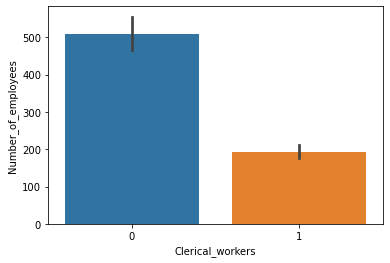

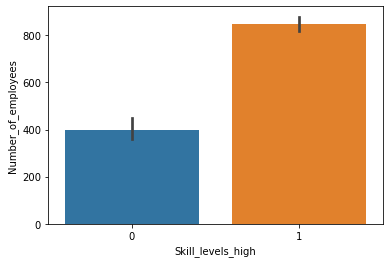

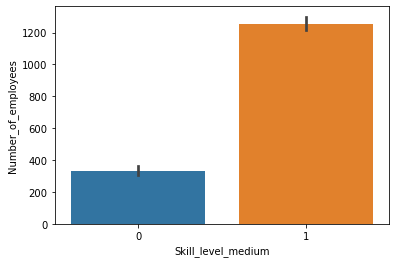

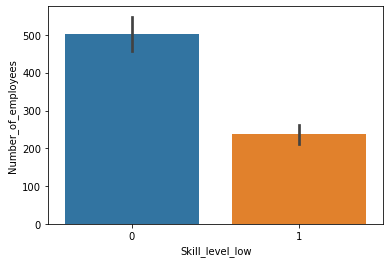

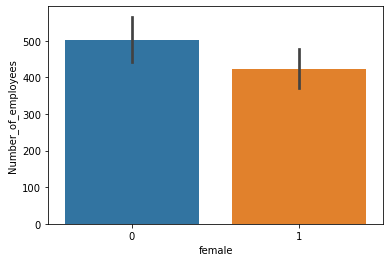

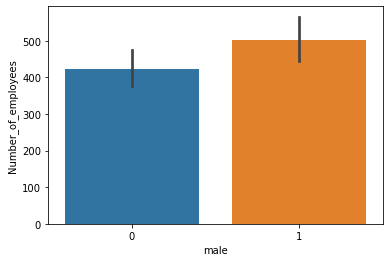

In [210]:
import matplotlib.pyplot as plt
from numpy import mean

# Function to plot barplots
def plot_barplot(column):
    x = sns.barplot(x=column, y="Number_of_employees", data=df, estimator=mean, ci=99)
    plt.show()  # Display the plot
    return x

# Plot barplots for different columns
columns_to_plot = ["Clerical_workers", "Skill_levels_high", "Skill_level_medium", "Skill_level_low", "female", "male"]

for column in columns_to_plot:
    plot_barplot(column)
    

In [211]:
import plotly.express as px
# Get min and max values for the scatter plot
xmin, xmax = min(df.Number_of_employees), max(df.Number_of_employees)
ymin, ymax = min(df.Year_Quarter), max(df.Year_Quarter)

# Create scatter plot using Plotly
fig = px.scatter(df,
                x='Number_of_employees',
                y='Year_Quarter',
                animation_group='Year_Quarter', 
                color='Number_of_employees',
                hover_name='Number_of_employees',
                width=500, height=1000,
                log_x=False, size_max=15,
                range_x=[xmin, xmax], range_y=[ymin, ymax])
fig.show()

## Section 14: Machine learning Models

In [212]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 1. LogisticRegression

In [213]:
# Preprocessing
X = df.drop(['Year_Quarter', 'male', 'female'], axis=1)
y = df['female']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

# Performance evaluation
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)
print(confusion_matrix(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.5555555555555556
[[37 30]
 [30 38]]
              precision    recall  f1-score   support

           0       0.55      0.55      0.55        67
           1       0.56      0.56      0.56        68

    accuracy                           0.56       135
   macro avg       0.56      0.56      0.56       135
weighted avg       0.56      0.56      0.56       135



## 2. KNeighborsClassifier

In [214]:

# Preprocessing
X = df.drop(['Year_Quarter', 'male', 'female'], axis=1)
y = df['male']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Performance evaluation
KNN_accuracy = accuracy_score(y_test, y_pred)
KNN_accuracy


0.9185185185185185

## 3. DecisionTreeClassifier

In [215]:

# Preprocessing
X = df.drop(['Year_Quarter', 'Clerical_workers'], axis=1)
y = df['Clerical_workers']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Performance evaluation
Decision_Tree_accuracy = accuracy_score(y_test, y_pred)
Decision_Tree_accuracy


0.9925925925925926

## 4. RandomForestClassifier

In [216]:

# Preprocessing
X = df.drop(['Year_Quarter', 'Skill_level_low'], axis=1)
y = df['Skill_level_low']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Model training and evaluation
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Performance evaluation
Random_Forest_accuracy = accuracy_score(y_test, y_pred)
Random_Forest_accuracy



1.0

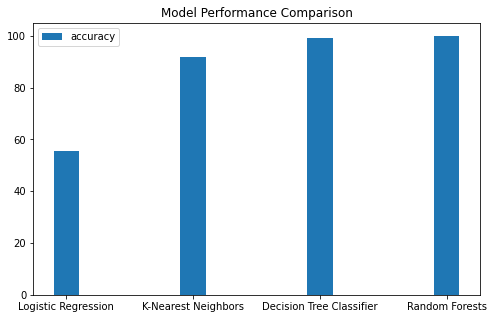

In [217]:
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Decision Tree Classifier', 'Random Forests']
accuracy = [55.55, 91.85, 99.25, 100.00]

x = range(len(models))

plt.figure(figsize=(8, 5))
plt.bar(x, accuracy, width=0.2, label='accuracy')
plt.xticks(x, models)
plt.legend()
plt.title('Model Performance Comparison')
plt.show()

 ## 5. Market Basket Analysis:

In [218]:
# Preprocessing
numeric_columns = ['male', 'female', 'Managers', 'Technicians', 'Clerical_workers', 'trades_workers',
                   'Skill_levels_high', 'Skill_level_medium', 'Skill_level_low']

df_numeric = df[numeric_columns].apply(pd.to_numeric, errors='coerce')
df_encoded = df_numeric.applymap(lambda x: 1 if x > 0 else 0)

frequent_employee = apriori(df_encoded, min_support=0.07, use_colnames=True)
my_rules = association_rules(frequent_employee, metric="lift", min_threshold=1)

# Filtering rules based on condition
filtered_rules = my_rules[(my_rules['lift'] >= 1) & (my_rules['confidence'] >= 0.1)]
filtered_rules

C:\Users\Omprakash vootla\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



antecedents           consequents  antecedent support   
0             (Managers)                (male)            0.142857  \
1                 (male)            (Managers)            0.500000   
2          (Technicians)                (male)            0.142857   
3                 (male)         (Technicians)            0.500000   
4                 (male)    (Clerical_workers)            0.500000   
5     (Clerical_workers)                (male)            0.142857   
6       (trades_workers)                (male)            0.142857   
7                 (male)      (trades_workers)            0.500000   
8    (Skill_levels_high)                (male)            0.142857   
9                 (male)   (Skill_levels_high)            0.500000   
10                (male)  (Skill_level_medium)            0.500000   
11  (Skill_level_medium)                (male)            0.142857   
12                (male)     (Skill_level_low)            0.500000   
13     (Skill_level_low)                (male)            0.142857   
14            (Managers)              (female)            0.142857   
15              (female)            (Managers)            0.500000   
16              (female)         (Technicians)            0.500000   
17         (Technicians)              (female)            0.142857   
18              (female)    (Clerical_workers)            0.500000   
19    (Clerical_workers)              (female)            0.142857   
20              (female)      (trades_workers)            0.500000   
21      (trades_workers)              (female)            0.142857   
22   (Skill_levels_high)              (female)            0.142857   
23              (female)   (Skill_levels_high)            0.500000   
24              (female)  (Skill_level_medium)            0.500000   
25  (Skill_level_medium)              (female)            0.142857   
26              (female)     (Skill_level_low)            0.500000   
27     (Skill_level_low)              (female)            0.142857   

    consequent support   support  confidence  lift  leverage  conviction   
0             0.500000  0.071429    0.500000   1.0       0.0         1.0  \
1             0.142857  0.071429    0.142857   1.0       0.0         1.0   
2             0.500000  0.071429    0.500000   1.0       0.0         1.0   
3             0.142857  0.071429    0.142857   1.0       0.0         1.0   
4             0.142857  0.071429    0.142857   1.0       0.0         1.0   
5             0.500000  0.071429    0.500000   1.0       0.0         1.0   
6             0.500000  0.071429    0.500000   1.0       0.0         1.0   
7             0.142857  0.071429    0.142857   1.0       0.0         1.0   
8             0.500000  0.071429    0.500000   1.0       0.0         1.0   
9             0.142857  0.071429    0.142857   1.0       0.0         1.0   
10            0.142857  0.071429    0.142857   1.0       0.0         1.0   
11            0.500000  0.071429    0.500000   1.0       0.0         1.0   
12            0.142857  0.071429    0.142857   1.0       0.0         1.0   
13            0.500000  0.071429    0.500000   1.0       0.0         1.0   
14            0.500000  0.071429    0.500000   1.0       0.0         1.0   
15            0.142857  0.071429    0.142857   1.0       0.0         1.0   
16            0.142857  0.071429    0.142857   1.0       0.0         1.0   
17            0.500000  0.071429    0.500000   1.0       0.0         1.0   
18            0.142857  0.071429    0.142857   1.0       0.0         1.0   
19            0.500000  0.071429    0.500000   1.0       0.0         1.0   
20            0.142857  0.071429    0.142857   1.0       0.0         1.0   
21            0.500000  0.071429    0.500000   1.0       0.0         1.0   
22            0.500000  0.071429    0.500000   1.0       0.0         1.0   
23            0.142857  0.071429    0.142857   1.0       0.0         1.0   
24            0.142857  0.071429    0.142857   1.0       0.0         1.0   
25    

In [219]:
## Based on Market Basket analyis Clerical_support_workers male is more frequent employees and male skill level high and skill level low employees.

## 6. PCA

In [220]:
df.head()

Year_Quarter  male  female  Number_of_employees  Managers  Technicians   
3       2022Q4     1       0                  952         0            0  \
4       2022Q4     1       0                 1361         0            0   
5       2022Q4     1       0                  135         0            0   
6       2022Q4     0       1                  992         0            0   
7       2022Q4     0       1                 1152         0            0   

   Clerical_workers  trades_workers  Skill_levels_high  Skill_level_medium   
3                 0               0                  1                   0  \
4                 0               0                  0                   1   
5                 0               0                  0                   0   
6                 0               0                  1                   0   
7                 0               0                  0                   1   

   Skill_level_low  
3                0  
4                0  
5                1  
6                0  
7                0

In [221]:
df_pca = df[['male','female','Managers','Technicians','Clerical_workers','trades_workers','Skill_levels_high','Skill_level_medium','Skill_level_low','Number_of_employees']]

In [222]:
df_pca.head()

male  female  Managers  Technicians  Clerical_workers  trades_workers   
3     1       0         0            0                 0               0  \
4     1       0         0            0                 0               0   
5     1       0         0            0                 0               0   
6     0       1         0            0                 0               0   
7     0       1         0            0                 0               0   

   Skill_levels_high  Skill_level_medium  Skill_level_low  Number_of_employees  
3                  1                   0                0                  952  
4                  0                   1                0                 1361  
5                  0                   0                1                  135  
6                  1                   0                0                  992  
7                  0                   1                0                 1152

In [223]:
df_pca.keys()

Index(['male', 'female', 'Managers', 'Technicians', 'Clerical_workers',
       'trades_workers', 'Skill_levels_high', 'Skill_level_medium',
       'Skill_level_low', 'Number_of_employees'],
      dtype='object')

In [224]:
df_pca.shape

(672, 10)

In [225]:
features = ['male', 'female', 'Managers', 'Technicians', 'Clerical_workers',
       'trades_workers', 'Skill_levels_high', 'Skill_level_medium',
       'Skill_level_low']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['Number_of_employees']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [226]:
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [227]:
finalDf = pd.concat([principalDf, df[['Number_of_employees']]], axis = 1)

In [228]:
finalDf

principal component 1  principal component 2  Number_of_employees
0                  1.414214               0.431271                  NaN
1                  1.414214               1.267609                  NaN
2                  1.414214              -0.302295                  NaN
3                 -1.414214               0.431271                952.0
4                 -1.414214               1.267609               1361.0
...                     ...                    ...                  ...
1146                    NaN                    NaN                630.0
1148                    NaN                    NaN                101.0
1149                    NaN                    NaN                154.0
1150                    NaN                    NaN                269.0
1151                    NaN                    NaN                126.0

[952 rows x 3 columns]

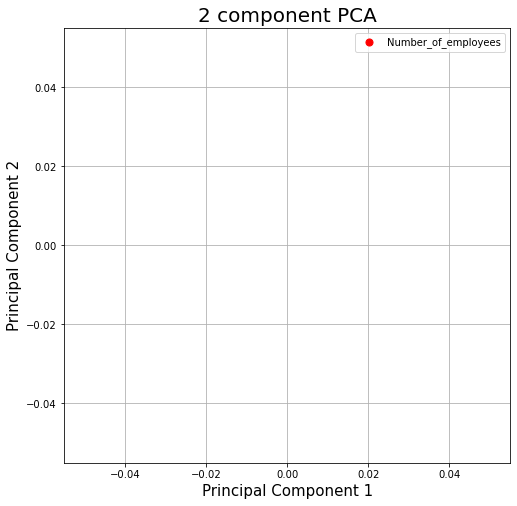

In [229]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Number_of_employees']
colors = ['r']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Number_of_employees'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [230]:
pca.explained_variance_ratio_

array([0.22222222, 0.12962963])